In [2]:
import pandas as pd
import pickle
import os
import numpy as np
from plotnine import *
import seaborn as sns
import matplotlib.pyplot as plt

import nltk
from textblob import TextBlob
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from wordcloud import WordCloud
import re
from nltk.stem import WordNetLemmatizer
import heapq
from bs4 import BeautifulSoup
import lxml
import requests
import random
import collections
plt.style.use('ggplot')
%matplotlib inline

wd5 = 'C:/Users/qxzhao/Documents/GitHub/STA160-Project-master/STA160-Jobs-Market-Project/Cybercoder/data'
os.chdir(wd5)

In [3]:
master_data_in = open('jobs_data.pickle', 'rb')
master_data = pickle.load(master_data_in)
master_data_in.close()

data_scientist_df_in = open('data_scientist_data.pickle', 'rb')
data_scientist_df = pickle.load(data_scientist_df_in)
data_scientist_df_in.close()

data_engineer_df_in = open('data_engineer_data.pickle', 'rb')
data_engineer_df = pickle.load(data_engineer_df_in)
data_engineer_df_in.close()

data_analyst_df_in = open('data_analyst_data.pickle', 'rb')
data_analyst_df = pickle.load(data_analyst_df_in)
data_analyst_df_in.close()

BI_df_in = open('BI_data.pickle', 'rb')
BI_df= pickle.load(BI_df_in)
BI_df_in.close()

In [4]:
master_data.head()

Search           Title  \
0  Data Scientist  Data Scientist   
1  Data Scientist  Data Scientist   
2  Data Scientist  Data Scientist   
3  Data Scientist  Data Scientist   
4  Data Scientist  Data Scientist   

                                         Description  \
0  Are you a Data Scientist who has machine learn...   
1  If you are a Data Scientist with 4+ years data...   
2  If you are a Data Scientist with experience, p...   
3  If you are a Data Scientist who enjoys buildin...   
4  If you are a Data Scientist with experience, p...   

                                              Skills            Location  \
0  Statistics, Machine Learning, Applied Mathematics     Los Angeles, CA   
1  Data Science, Machine Learning, R, Python, SQL...   San Francisco, CA   
2  Statistics, Mathematics, Computer Science, Mac...  Woodland Hills, CA   
3  Python, Java, SQL (BigQuery/Oracle and Hive), ...     Los Angeles, CA   
4          R Language, Python, Datasets, SQL Queries          Austin, TX   

           Cities States   Latitude   Longitude Min_Salary Max_Salary  \
0     Los Angeles     CA  34.052234 -118.243685     100000     200000   
1   San Francisco     CA  37.774929 -122.419415     110000     175000   
2  Woodland Hills     CA  34.165357 -118.608975    Unknown    Unknown   
3     Los Angeles     CA  34.052234 -118.243685     120000     160000   
4          Austin     TX  30.267153  -97.743061    Unknown    Unknown   

  Mean_Salary                                                URL  
0      150000  https://www.cybercoders.com/data-scientist-job...  
1      142500  https://www.cybercoders.com/data-scientist-job...  
2     Unknown  https://www.cybercoders.com/data-scientist-job...  
3      140000  https://www.cybercoders.com/data-scientist-job...  
4     Unknown  https://www.cybercoders.com/data-scientist-job...

# 1.) Data Exploration 

## Population Search Term Frequencies
### How many listings are represented for each job type (Data Scientist, Data Engineer, Data Analyst, and Business Intelligence) within the population?

In [5]:
search_counts = master_data['Search'].value_counts()
search_counts

Data Engineer            346
Data Scientist            67
Data Analyst              49
Business Intelligence     48
Name: Search, dtype: int64

On the cybercoders website, given these four search terms the Data Engineer term is by far the most frequent listing. This may skew our data and will need to be accounted for in this analysis. 

### What is the percentage allocation for each job type (Data Scientist, Data Engineer, Data Analyst, and Business Intelligence) in our population?

In [6]:
search_freqDF = pd.DataFrame({'Frequency' : search_counts.values, 'Search' : search_counts.index, })
search_freqDF = search_freqDF[['Search','Frequency']]

percent1 = []
for i in range(len(search_freqDF)):
    holder1 = round(search_freqDF['Frequency'][i] / search_counts.values.sum(), 4)
    percent1.append(holder1)

search_freqDF['Percent of Total'] = percent1

search_freqDF

Search  Frequency  Percent of Total
0          Data Engineer        346            0.6784
1         Data Scientist         67            0.1314
2           Data Analyst         49            0.0961
3  Business Intelligence         48            0.0941

As noted previously, a large proportion of the listings scraped given the four search terms (Data Scientist, Data Engineer, Data Analyst, and Business Intelligence) are allocated to the Data Engineer position at 67.24%

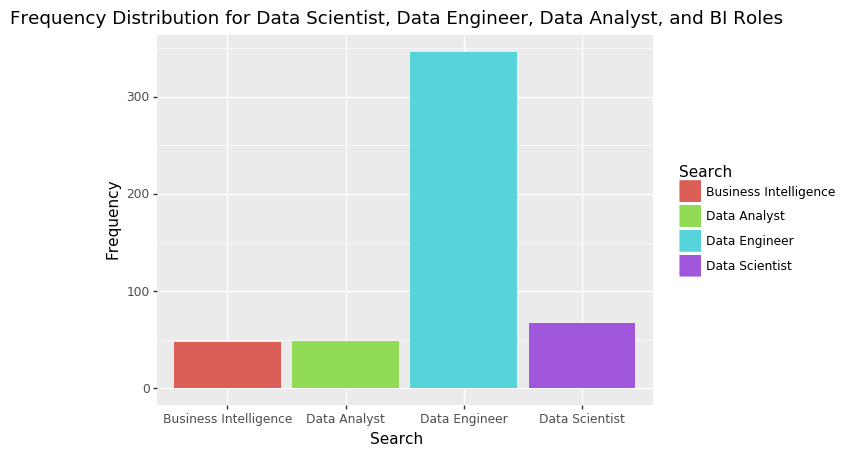

<ggplot: (-9223371877344825144)>

In [7]:
(ggplot(master_data, aes(x = 'Search',fill = 'Search')) +
 geom_bar(stat = "count", position='stack') +
 labs(title = "Frequency Distribution for Data Scientist, Data Engineer, Data Analyst, and BI Roles", x = "Search", y = "Frequency")
)

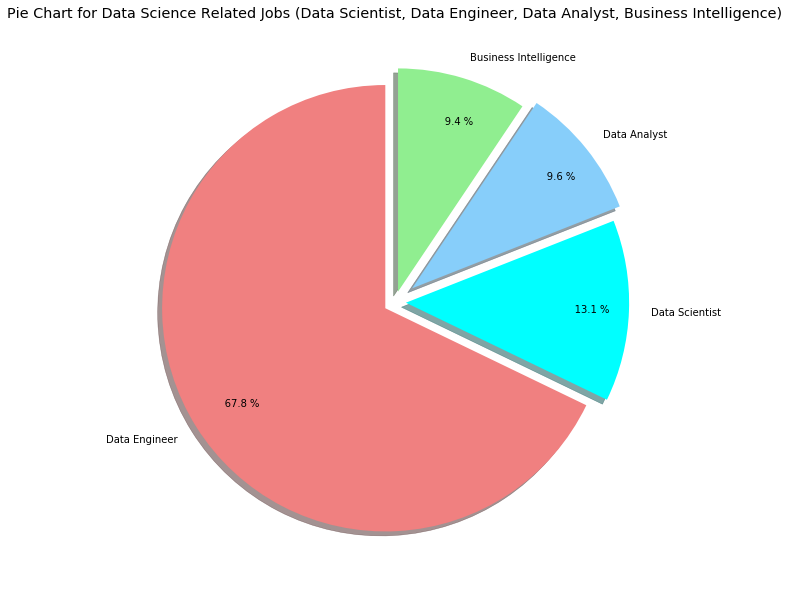

In [8]:
plt.rcParams['figure.figsize'] = (10,20)
labels = search_counts.index[0], search_counts.index[1], search_counts.index[2], search_counts.index[3]
fracs = [search_counts[i] for i in range(len(search_counts))]
explode = [0.05, 0.05, 0.1, 0.05]
plt.axes(aspect=1)  
colors = ['lightcoral', 'cyan','lightskyblue','lightgreen']
plt.title('Pie Chart for Data Science Related Jobs (Data Scientist, Data Engineer, Data Analyst, Business Intelligence)')
plt.pie(x=fracs, labels=labels, explode=explode, autopct='%9.1f %%', colors=colors,
        shadow=True, labeldistance=1.1, startangle = 90, pctdistance = 0.8)
plt.show()

## Population State Frequencies
### What are the state frequencies representing our population?

In [9]:
state_counts = master_data['States'].value_counts()
state_counts.head()

CA    256
NY     49
MA     28
VA     19
TX     15
Name: States, dtype: int64

Here we discover that 255 of our listings are those located in the state of California. Intuition says that this may be due to the large number of technology jobs in the Silicon Valley/Bay Area. Given that we are interested in data science related jobs this makes sense. 

In [10]:
state_freqDF = pd.DataFrame({'Frequency' : state_counts.values, 'States' : state_counts.index, })
state_freqDF = state_freqDF[['States','Frequency']]

percent2 = []
for i in range(len(state_freqDF)):
    holder2 = round(state_freqDF['Frequency'][i] / state_counts.values.sum(), 4)
    percent2.append(holder2)

state_freqDF['Percent of Total'] = percent2

state_freqDF.head()

States  Frequency  Percent of Total
0     CA        256            0.5020
1     NY         49            0.0961
2     MA         28            0.0549
3     VA         19            0.0373
4     TX         15            0.0294

As noted previously, a large proportion of the listings scraped given the four search terms (Data Scientist, Data Engineer, Data Analyst, and Business Intelligence) are allocated to California at 49.13%. This covers almost half of the total states represented in our population. 

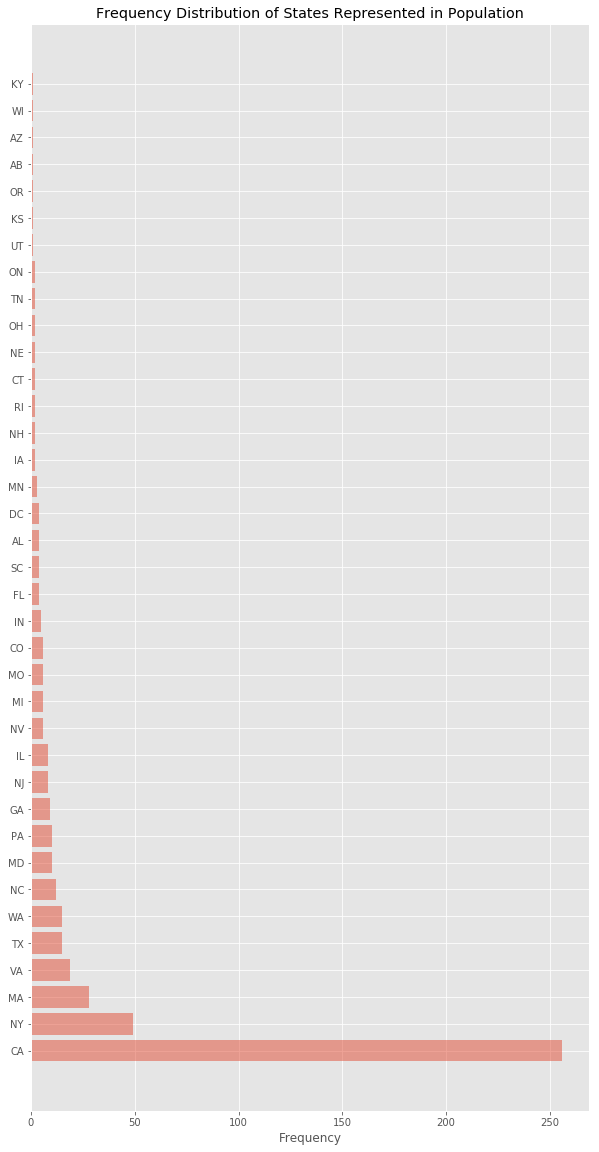

In [11]:
objects = state_counts.index
y_pos = np.arange(len(objects))
performance = state_counts.values
 
plt.barh(y_pos, performance, align='center', alpha=0.5)
plt.yticks(y_pos, objects)
plt.xlabel('Frequency')
plt.title('Frequency Distribution of States Represented in Population')
 
plt.show()

## Search Term Frequency Per State 
### How many listings are represented for each job type (Data Scientist, Data Engineer, Data Analyst, and Business Intelligence) within each state?

In [12]:
state_grouper = master_data.groupby('States')
jobs_per_state = state_grouper['Search'].value_counts()
jobs_per_state = jobs_per_state.reset_index(name = 'Frequency')
jobs_per_state.head()

States                 Search  Frequency
0     AB         Data Scientist          1
1     AL          Data Engineer          3
2     AL  Business Intelligence          1
3     AZ           Data Analyst          1
4     CA          Data Engineer        177

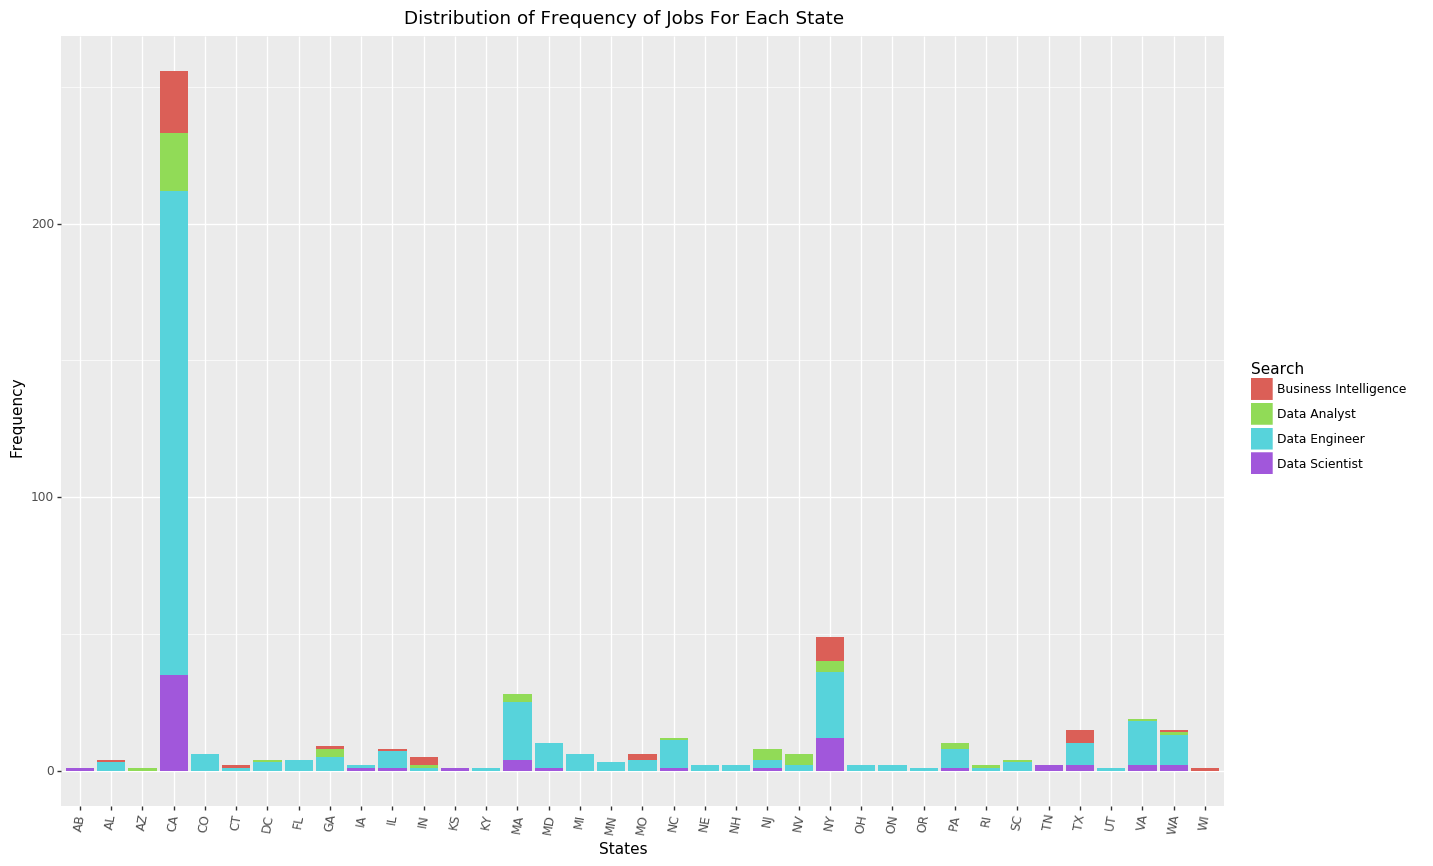

<ggplot: (-9223371877339709338)>

In [13]:
(ggplot(jobs_per_state, aes(x = "States", y = 'Frequency', fill="Search")) +
 geom_bar(stat = "identity",position='stack')+
 theme(figure_size=(15, 10),axis_text_x= element_text(rotation=80))+
 labs(title = "Distribution of Frequency of Jobs For Each State", x = "States", y = "Frequency")
)

As you can see from the above plot CA and NY stand out in that they represent each of the four job types. Next, we'll standardize the counts for each state given the search term to remove the skew due to the largest proportion of listings located in the state of California. 

### What are the proportions for each job type (Data Scientist, Data Engineer, Data Analyst, and Business Intelligence) in each state?
### Do some states have a greater proportion of their available listings allocated to a particular job type?

In [14]:
search_state_set = np.unique(jobs_per_state['States'])
search_state_dict = dict(tuple(jobs_per_state.groupby('States')))

search_freqDF = []
for state in search_state_set:
    search_state_freqDF = pd.DataFrame({'Frequency' : list(search_state_dict[state]['Frequency']), 
                                        'Search' : list(search_state_dict[state]['Search']),
                                        'States' : list(search_state_dict[state]['States'])})
    search_state_freqDF = search_state_freqDF[['States', 'Search', 'Frequency']]

    percent4 = []

    for i in range(len(search_state_freqDF)):
        holder4 = round(search_state_freqDF['Frequency'][i] / sum(list(search_state_freqDF['Frequency'])),4)
        percent4.append(holder4)
    search_state_freqDF['Percent of Total'] = percent4
    search_freqDF.append(search_state_freqDF)

search_freqDF = pd.concat(search_freqDF, ignore_index = True)
search_freqDF.head()

States                 Search  Frequency  Percent of Total
0     AB         Data Scientist          1            1.0000
1     AL          Data Engineer          3            0.7500
2     AL  Business Intelligence          1            0.2500
3     AZ           Data Analyst          1            1.0000
4     CA          Data Engineer        177            0.6914

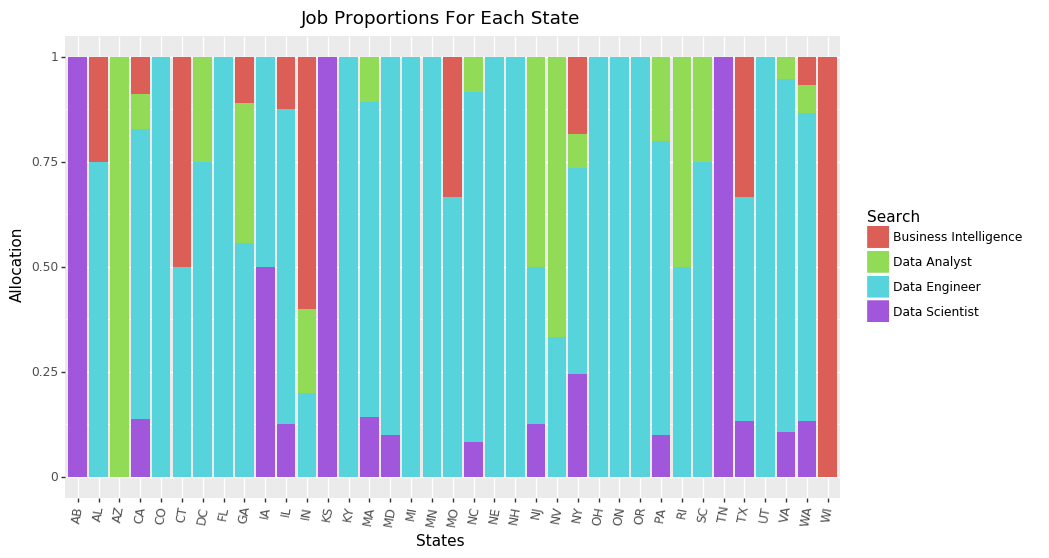

<ggplot: (-9223371877339799643)>

In [16]:
(ggplot(search_freqDF, aes(x = "States", y = 'Percent of Total', fill="Search")) +
 geom_bar(stat = "identity",position='stack')+
 theme(figure_size=(10, 6),axis_text_x= element_text(rotation=80))+
 labs(title = "Job Proportions For Each State", x = "States", y = "Allocation")
)

After converting the frequency of listings for each job type given a state we are able to have a better look at the variety of data science related options for each state. Some noteworthy states are as follows: 

Four job types represented:
CA, NY

Three job types represented:
GA, IN, MA, MO, NC, NJ, PA, TX, VA, and WA

Later on we'll analyze skills and if you are interested in more than one of the given job types the above states may be a good place to look for a variety of data science related positions. 

## City Frequencies Per State
### What are the frequencies for each city within the represented states?
### Do any cities in particular stand out which may indicative of a hotspot for data science jobs?

In [17]:
city_grouper = master_data.groupby('States')
jobs_per_city = city_grouper['Cities'].value_counts()
jobs_per_city = jobs_per_city.reset_index(name = 'Frequency')
jobs_per_city = jobs_per_city.sort_values(by = 'Frequency',ascending = False).reset_index(drop = True)
jobs_per_city.head()

States         Cities  Frequency
0     CA  San Francisco         46
1     NY  New York City         35
2     CA       San Jose         24
3     CA      San Mateo         22
4     CA         Irvine         21

For now we'll ignore the fact that California is vastly represented in our population and can conclude that the following cities may be great places to search for Data Scientist, Data Engineer, Data Analyst, and Business Intelligence jobs.

1.) San Francisco, CA
2.) New York City, NY
3.) San Mateo, CA
4.) San Jose, CA
5.) Irvine, CA
6.) Los Angeles, CA
7.) Palo Alto, CA
8.) Seattle, WA
9.) Redwood City, CA
10.) Cambridge, MA

The idea behind why we feel that it is reasonable to ignore the much larger proportion of listings located in California is based on the fact that many of the technology companies which are known to have more data science positions are located in the Bay Area. We can see from above that five out of the top 10 represented cities are located in this area. 

In [18]:
jobs_per_city[:15]

States         Cities  Frequency
0      CA  San Francisco         46
1      NY  New York City         35
2      CA       San Jose         24
3      CA      San Mateo         22
4      CA         Irvine         21
5      CA    Los Angeles         18
6      WA        Seattle         11
7      CA      Palo Alto         11
8      CA   Redwood City          8
9      GA        Atlanta          8
10     IL        Chicago          7
11     MA      Cambridge          7
12     CA   Santa Monica          7
13     CA      Sunnyvale          7
14     VA      Arlington          7

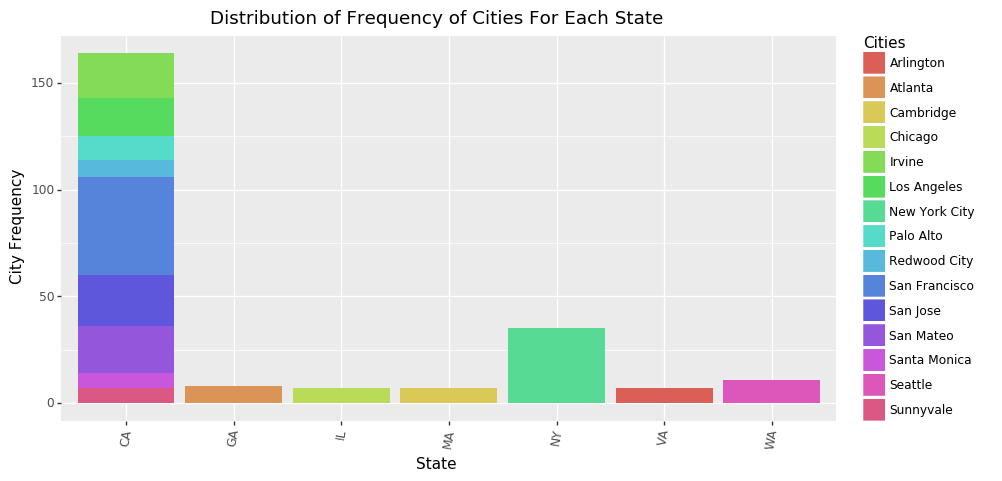

<ggplot: (-9223371877339724491)>

In [19]:
(ggplot(jobs_per_city[:15], aes(x = "States", y = 'Frequency', fill="Cities")) +
 geom_bar(stat = "identity", position='stack', show_legend = True)+
 theme(figure_size=(10, 5),axis_text_x= element_text(rotation=80))+
 labs(title = "Distribution of Frequency of Cities For Each State", x = "State", y = "City Frequency")
)

In order to support our previous statement, California stands out because compared to the other states there are many different options for city locations within that state. Unlike the other top city states where there are no more than two city options. 

### How does the number of cities proportionate to the total number of listings for a particular state effect the distribution of listings in our population?

In [21]:
search_cities_set = np.unique(jobs_per_city['States'])
search_cities_dict = dict(tuple(jobs_per_city.groupby('States')))

search_cit_freqDF = []
for city in search_cities_set:
    search_cities_freqDF = pd.DataFrame({'Frequency' : list(search_cities_dict[city]['Frequency']), 
                                         'Cities' : list(search_cities_dict[city]['Cities']),
                                         'States' : list(search_cities_dict[city]['States'])})
    
    search_cities_freqDF = search_cities_freqDF[['States','Cities','Frequency']]

    percent5 = []

    for i in range(len(search_cities_freqDF)):
        holder5 = round(search_cities_freqDF['Frequency'][i] / sum(list(search_cities_freqDF['Frequency'])),4)
        percent5.append(holder5)
    search_cities_freqDF['Percent of Total'] = percent5
    search_cit_freqDF.append(search_cities_freqDF)

search_cit_freqDF = pd.concat(search_cit_freqDF, ignore_index = True)
search_cit_freqDF = search_cit_freqDF.sort_values(by = 'States',ascending = True).reset_index(drop = True)
search_cit_freqDF.head()

States       Cities  Frequency  Percent of Total
0     AB      Calgary          1              1.00
1     AL  Albertville          2              0.50
2     AL   Huntsville          1              0.25
3     AL       Daphne          1              0.25
4     AZ   Scottsdale          1              1.00

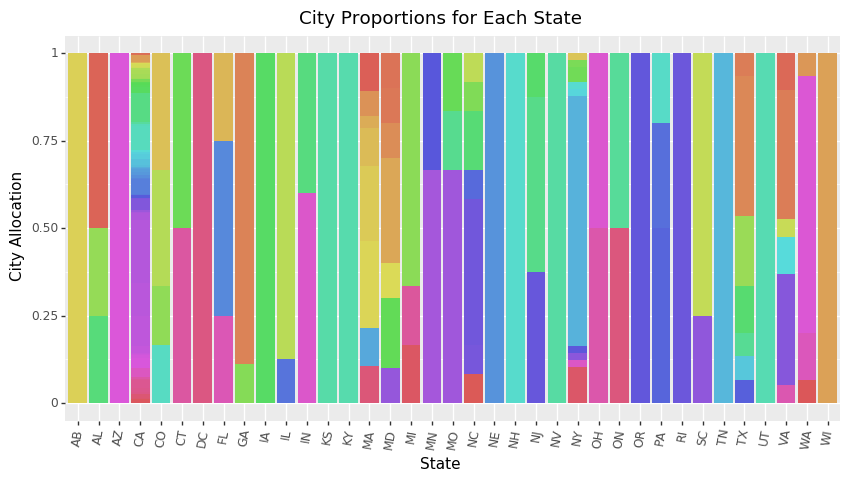

<ggplot: (-9223371877339749460)>

In [22]:
(ggplot(search_cit_freqDF, aes(x = "States", y = 'Percent of Total', fill="Cities")) +
 geom_bar(stat = "identity", position='stack', show_legend = False)+
 theme(figure_size=(10, 5),axis_text_x= element_text(rotation=80))+
 labs(title = "City Proportions for Each State", x = "State", y = "City Allocation")
)

You will notice above that states with a greater number of cities represented given our listings is indicative of a wider range of options for relocation when thinking about your job search. 

California, Colorado, Massachussetts, Maryland, and North Carolina have a large number of cities represented by our listings meaning a job seeker has options for the same job title but in different cities with a preferred state. 

## Data Scientist Listing Frequencies Per City
### What are the top 10 cities in the USA for a person seeking a Data Scientist position?

In [23]:
ds_city_grouper = data_scientist_df.groupby('Location')
ds_per_city = ds_city_grouper['Search'].value_counts()
ds_per_city = ds_per_city.reset_index(name = 'Frequency')
ds_per_city = ds_per_city.sort_values(by = 'Frequency',ascending = False).reset_index(drop = True)
ds_per_city.head()

Location          Search  Frequency
0  New York City, NY  Data Scientist         11
1  San Francisco, CA  Data Scientist         11
2    Los Angeles, CA  Data Scientist          4
3      Sunnyvale, CA  Data Scientist          3
4      San Mateo, CA  Data Scientist          3

In [24]:
TOP_ds = ds_per_city[:10]

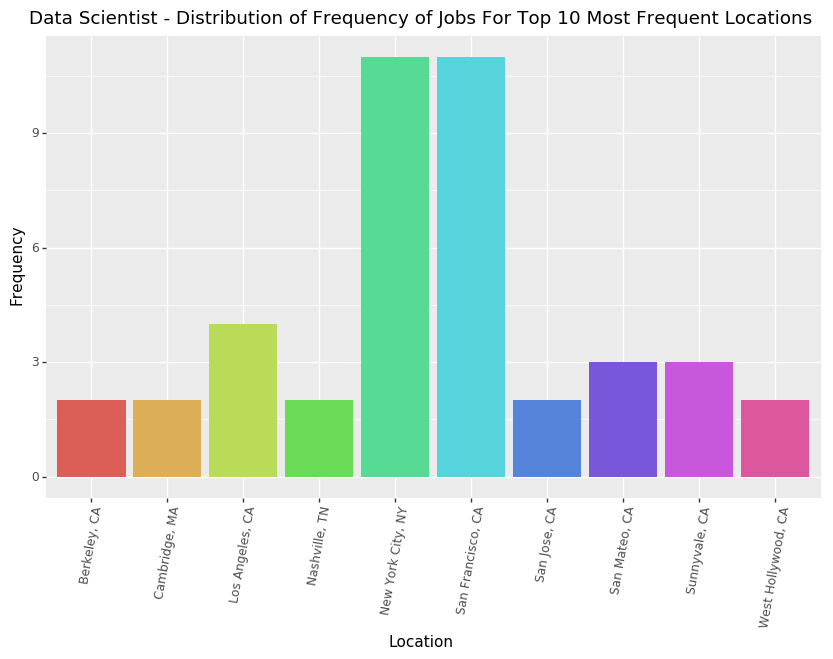

<ggplot: (159515073670)>

In [25]:
(ggplot(TOP_ds, aes(x = "Location", y = 'Frequency', fill='Location')) +
 geom_bar(stat = "identity", position='stack', show_legend = False)+
 theme(figure_size=(10, 6),axis_text_x= element_text(rotation=80))+
 labs(title = "Data Scientist - Distribution of Frequency of Jobs For Top 10 Most Frequent Locations", x = "Location", y = "Frequency")
)

If you are seeking a data scientist position, your best option is to look in New York City - NY and San Francisco - CA. 

## Data Engineer Listing Frequencies Per City
### What are the top 10 cities in the USA for a person seeking a Data Engineer position?

In [26]:
de_city_grouper = data_engineer_df.groupby('Location')
de_per_city = de_city_grouper['Search'].value_counts()
de_per_city = de_per_city.reset_index(name = 'Frequency')
de_per_city = de_per_city.sort_values(by = 'Frequency',ascending = False).reset_index(drop = True)
de_per_city.head()

Location         Search  Frequency
0  San Francisco, CA  Data Engineer         32
1       San Jose, CA  Data Engineer         20
2  New York City, NY  Data Engineer         18
3      San Mateo, CA  Data Engineer         16
4         Irvine, CA  Data Engineer         14

In [27]:
TOP_de = de_per_city[:10]

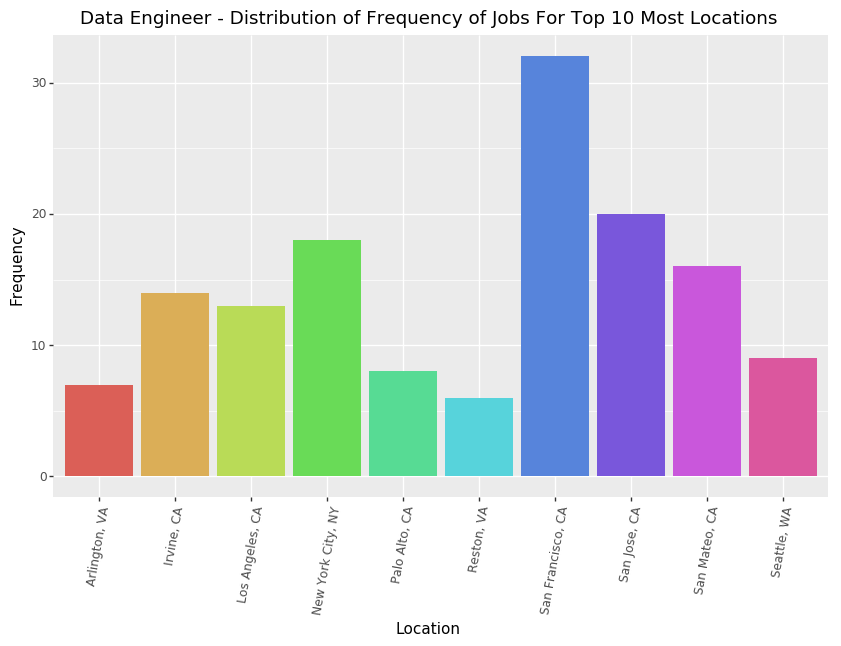

<ggplot: (159515203062)>

In [28]:
(ggplot(TOP_de, aes(x = "Location", y = 'Frequency', fill='Location')) +
 geom_bar(stat = "identity", position='stack', show_legend = False)+
 theme(figure_size=(10, 6),axis_text_x= element_text(rotation=80))+
 labs(title = "Data Engineer - Distribution of Frequency of Jobs For Top 10 Most Locations", x = "Location", y = "Frequency")
)

If you are seeking a data engineering position, your best option is to look in San Francisco - CA, San Jose - CA, San Mateo - CA, and New York City - NY. 

## Data Analyst Listing Frequencies Per City
### What are the top 10 cities in the USA for a person seeking a Data Analyst position?

In [29]:
da_city_grouper = data_analyst_df.groupby('Location')
da_per_city = da_city_grouper['Search'].value_counts()
da_per_city = da_per_city.reset_index(name = 'Frequency')
da_per_city = da_per_city.sort_values(by = 'Frequency',ascending = False).reset_index(drop = True)
da_per_city.head()

Location        Search  Frequency
0  New York City, NY  Data Analyst          4
1      Las Vegas, NV  Data Analyst          4
2        Atlanta, GA  Data Analyst          3
3        Ventura, CA  Data Analyst          3
4      Princeton, NJ  Data Analyst          3

In [30]:
TOP_da = da_per_city[:10]

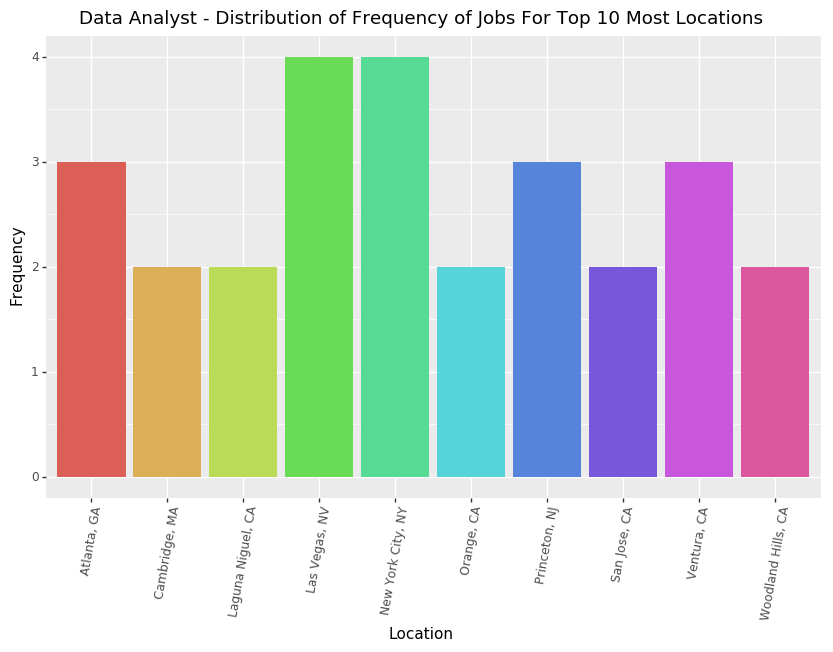

<ggplot: (-9223371877339818615)>

In [31]:
(ggplot(TOP_da, aes(x = "Location", y = 'Frequency', fill='Location')) +
 geom_bar(stat = "identity", position='stack', show_legend = False)+
 theme(figure_size=(10, 6),axis_text_x= element_text(rotation=80))+
 labs(title = "Data Analyst - Distribution of Frequency of Jobs For Top 10 Most Locations", x = "Location", y = "Frequency")
)

If you are seeking a data analyst position, your best option is to look in Las Vegas - NV, New York City - NY, Atlanta - GA, Princeton - NJ, and Ventura - CA. 

## Business Intelligence Listing Frequency Per City
### What are the top 10 cities in the USA for a person seeking a Business Intelligence position?

In [32]:
bi_city_grouper = BI_df.groupby('Location')
bi_per_city = bi_city_grouper['Search'].value_counts()
bi_per_city = bi_per_city.reset_index(name = 'Frequency')
bi_per_city = bi_per_city.sort_values(by = 'Frequency',ascending = False).reset_index(drop = True)
bi_per_city.head()

Location                 Search  Frequency
0        Irvine, CA  Business Intelligence          7
1  White Plains, NY  Business Intelligence          5
2    South Bend, IN  Business Intelligence          3
3     San Mateo, CA  Business Intelligence          3
4     Palo Alto, CA  Business Intelligence          3

In [33]:
TOP_bi = bi_per_city[:10]

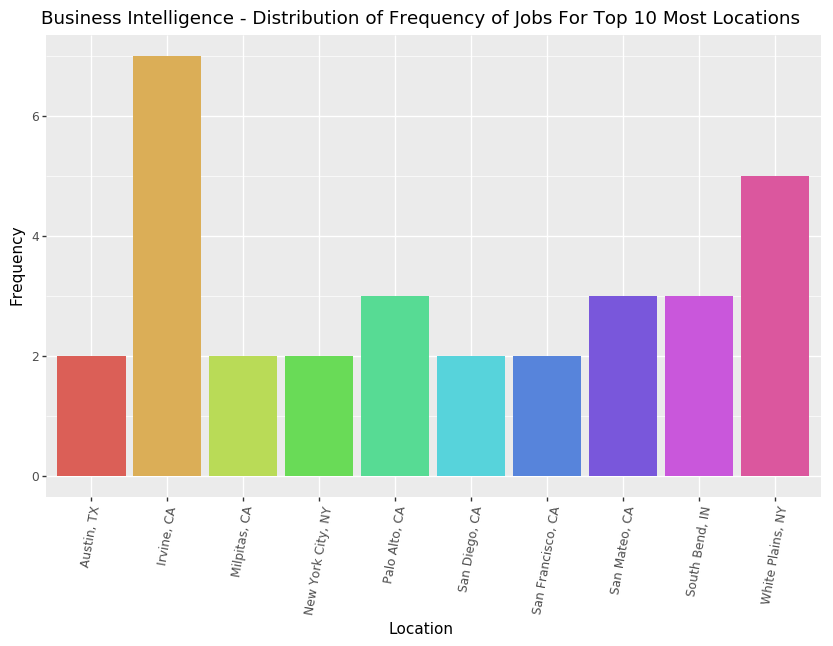

<ggplot: (-9223371877339670219)>

In [34]:
(ggplot(TOP_bi, aes(x = "Location", y = 'Frequency', fill='Location')) +
 geom_bar(stat = "identity", position='stack', show_legend = False)+
 theme(figure_size=(10, 6),axis_text_x= element_text(rotation=80))+
 labs(title = "Business Intelligence - Distribution of Frequency of Jobs For Top 10 Most Locations", x = "Location", y = "Frequency")
)

If you are seeking a business intelligence position, your best option is to look in Irvine - CA and White Plains - NY.

# 2.) Analysis - Preferred Qualifications 

In [35]:
stop_words = stopwords.words("english") + ['data',
                                           'analysis',
                                           'development',
                                           'design',
                                           'modeling',
                                           'systems',
                                           'analytics',
                                           'test',
                                           'management',
                                           'security',
                                           'server',
                                           'system',
                                           'engineering',
                                           'model',
                                           'experience', 
                                           'data', 
                                           'structures',
                                           'science',
                                           'software',
                                           'algorithms',
                                           'testing',
                                           'business']


In [36]:
skills_df = master_data.copy()

In [37]:
for i in range(len(skills_df)):
    skills_df.loc[i, 'Skills'] = skills_df['Skills'][i].replace("Machine Learning",'Machine-Learning')
    skills_df.loc[i, 'Skills'] = skills_df['Skills'][i].replace("Big Data",'Big-Data')
    skills_df.loc[i, 'Skills'] = skills_df['Skills'][i].replace("Tekla Structures",'Tekla-Structures')

In [38]:
skills_set = set(skills_df['Skills'])

In [40]:
def wordnet_pos(tag):
    """Map a Brown POS tag to a WordNet POS tag."""
    
    table = {"N": wordnet.NOUN, "V": wordnet.VERB, "R": wordnet.ADV, "J": wordnet.ADJ}
    
    # Default to a noun.
    return table.get(tag[0], wordnet.NOUN)

def newtext(text):
    '''Return a new text after the stopwords and lemmatizing'''
    blob = TextBlob(text)
    new_text = " ".join(w for w in blob.words if w.lower() not in stop_words)
    blob = TextBlob(new_text)
    tags = [wordnet_pos(x[1]) for x in blob.pos_tags]
    new_text = " ".join(x.lemmatize(t) for x, t in zip(blob.words, tags))
    blob = TextBlob(new_text)
    return new_text

def ReturnCount(text):
    '''Return a word counts dictionary'''
    new = newtext(text)
    blob = TextBlob(new)
    return blob.word_counts  

def countdata(text):
    '''
    Sort the counts of each distinct word
    input:text(string)
    output:datafrane of the word counts dictionary
    '''
    dic = ReturnCount(text)
    count=pd.DataFrame(list(dic.items()), columns=['word', 'count'])
    return count

def countsort(text):
    '''
    sort the countdata
    input:text(string)
    output:dataframe of 10 most frequent words and their counts
    '''
    df1 = countdata(text)
    newdf = df1.sort_values(by='count', ascending=False).head(20)
    return newdf

def barplot(text,theme):
    '''
    input:text(string),theme like art,sports(string)
    output:barplot of the most frequent words and counts
    '''
    data = countsort(text)
    new = newtext(text)
    plt.rcParams['figure.figsize'] = (10, 10)
    sns.set(font_scale = 1.5)

    sns.set_style("whitegrid")
    fruit_bar = sns.barplot(x = "word", y = "count", data =data)
    for item in fruit_bar.get_xticklabels():
        item.set_rotation(60)
    plt.title(theme)
    fruit_bar.set(ylabel = 'Count', xlabel = 'Word')
    p=plt.show()
    return p

def wordcloud(text,theme):
    '''
    input:text(string),theme like art,sports(string)
    output:wordcloud of the text
    '''
    data=countsort(text)
    new=newtext(text)

    # Generate a word cloud image
    wordcloud = WordCloud().generate(new)

   # lower max_font_size
    wordcloud = WordCloud(max_font_size=40).generate(new)
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title('wordcloud of '+theme)
    p=plt.show()
    return p


### Top Skills Overall (Data Scientist, Data Engineer, Data Analyst, Business Intelligence)

In [41]:
skills=' '.join([str(i) for i in skills_df['Skills']])
skills_frequency = countsort(skills)
skills_frequency = skills_frequency.sort_values(by = 'count', ascending = False).reset_index(drop = True)
skills_frequency = skills_frequency.rename(columns = {'word' : 'Overall', 'count' : 'Frequency'})
skills_frequency.head()

Overall  Frequency
0            python        167
1              java        138
2               sql        136
3  machine-learning         96
4                 c         89

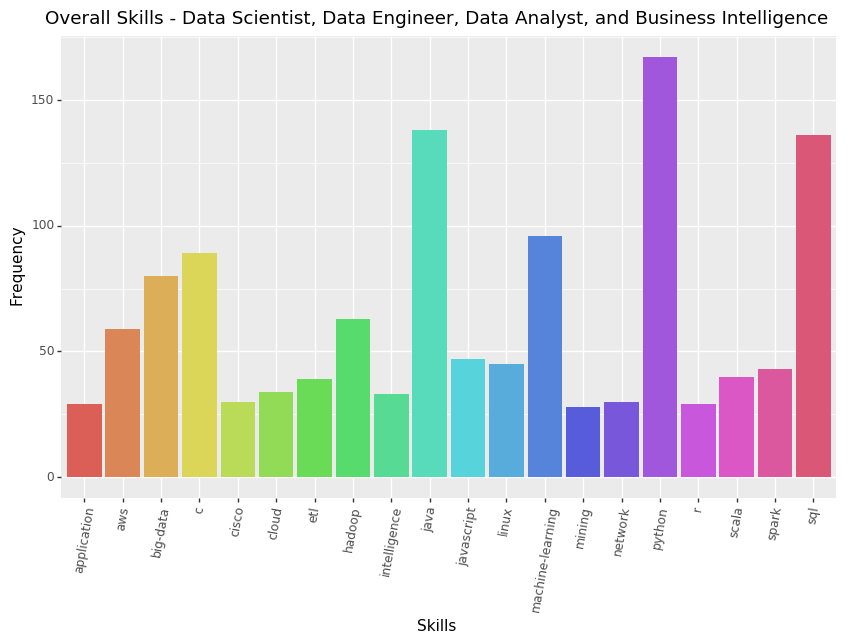

<ggplot: (-9223371877339420230)>

In [42]:
(ggplot(skills_frequency, aes(x = "Overall", y = 'Frequency', fill='Overall')) +
 geom_bar(stat = "identity", position='stack', show_legend = False)+
 theme(figure_size=(10, 6),axis_text_x= element_text(rotation=80))+
 labs(title = "Overall Skills - Data Scientist, Data Engineer, Data Analyst, and Business Intelligence", x = "Skills", y = "Frequency")
)

In [43]:
def grey_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    """
    Purpose : Change the color of the words in the word cloud to grey scale 
    """
    return "hsl(0, 0%%, %d%%)" % random.randint(70, 100)

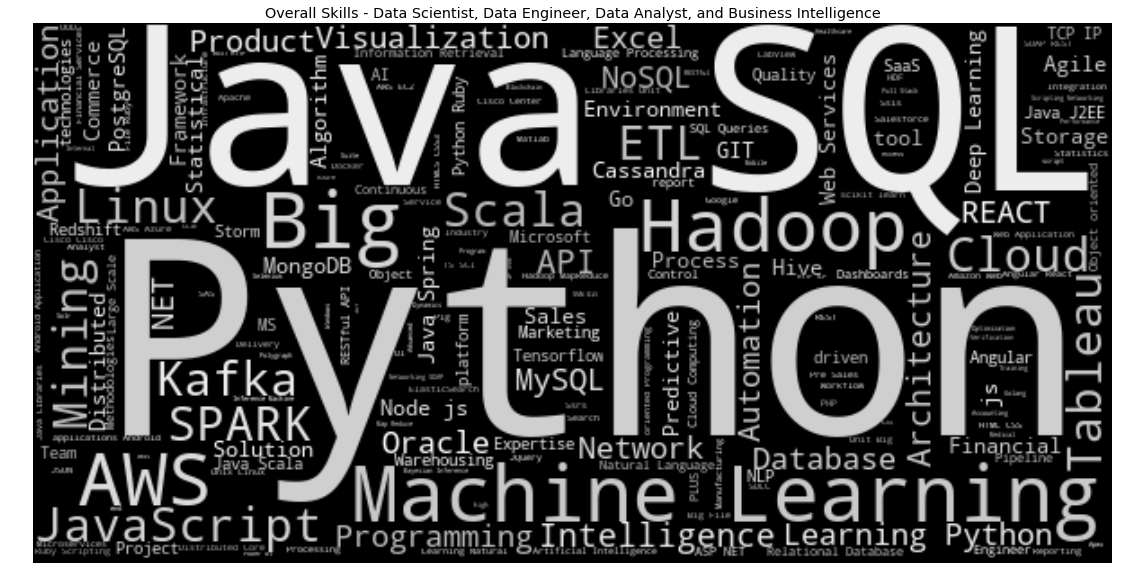

In [44]:
overall_skills = WordCloud(relative_scaling = 0, stopwords = stop_words, width = 600, height = 300)
overall_skills.generate(skills)
plt.figure(figsize = (15,7.5))
plt.imshow(overall_skills.recolor(color_func = grey_color_func, random_state = 1), interpolation = "bilinear")
plt.axis("off")
plt.tight_layout(pad = -1)
plt.title("Overall Skills - Data Scientist, Data Engineer, Data Analyst, and Business Intelligence")
plt.show()

### Top Skills - Data Scientist

In [45]:
ds_skills=' '.join([str(i) for i in data_scientist_df['Skills']])
ds_skills_frequency = countsort(ds_skills)
ds_skills_frequency = ds_skills_frequency.sort_values(by = 'count', ascending = False).reset_index(drop = True)
ds_skills_frequency = ds_skills_frequency.rename(columns = {'word' : 'Data Scientist', 'count' : 'Frequency'})
ds_skills_frequency.head()

Data Scientist  Frequency
0       learning         62
1        machine         54
2         python         46
3              r         20
4            sql         18

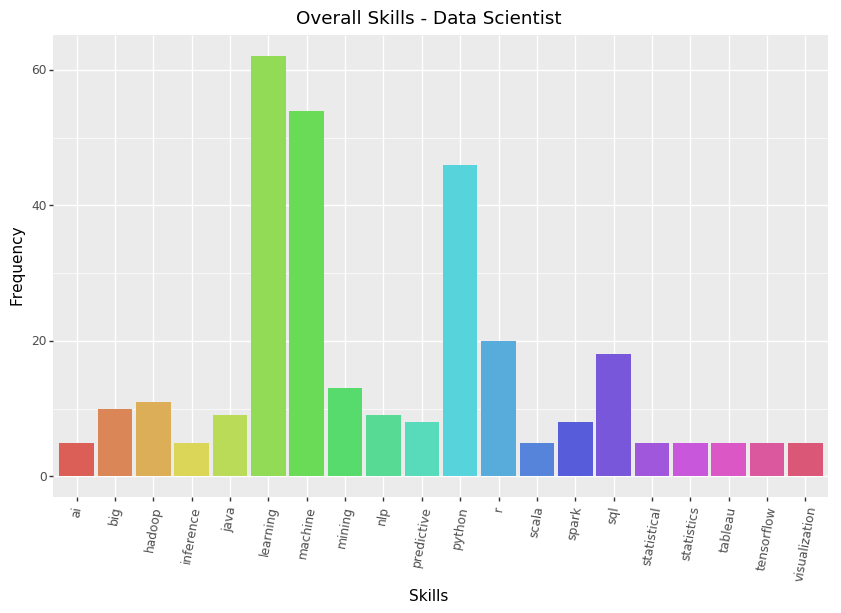

<ggplot: (-9223371877336155346)>

In [46]:
(ggplot(ds_skills_frequency, aes(x = "Data Scientist", y = 'Frequency', fill='Data Scientist')) +
 geom_bar(stat = "identity", position='stack', show_legend = False)+
 theme(figure_size=(10, 6),axis_text_x= element_text(rotation=80))+
 labs(title = "Overall Skills - Data Scientist", x = "Skills", y = "Frequency")
)

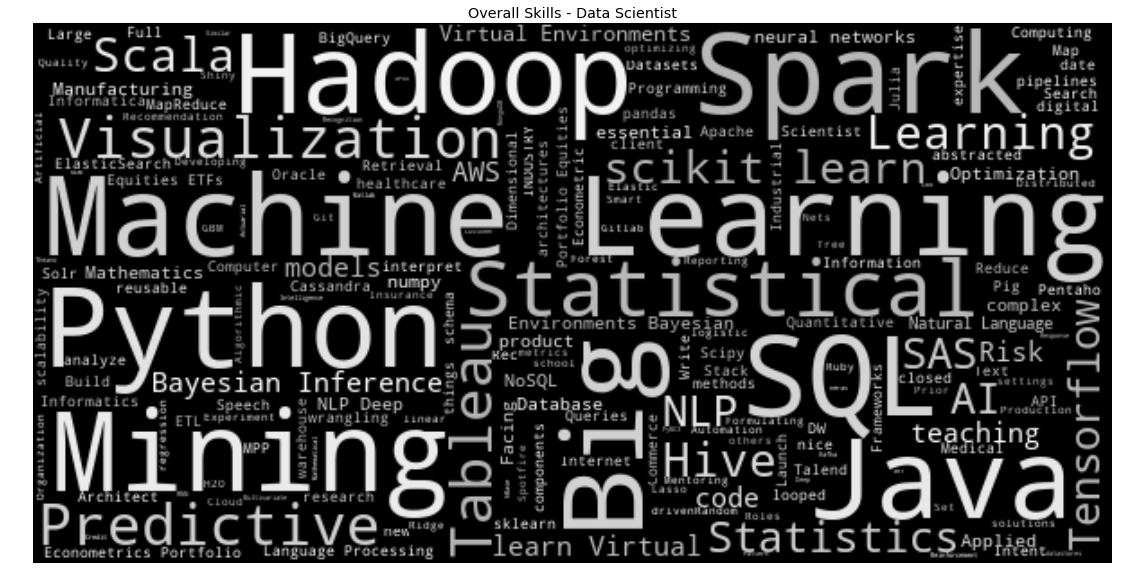

In [47]:
ds_overall_skills = WordCloud(relative_scaling = 0, stopwords = stop_words, width = 600, height = 300)
ds_overall_skills.generate(ds_skills)
plt.figure(figsize = (15,7.5))
plt.imshow(ds_overall_skills.recolor(color_func = grey_color_func, random_state = 1), interpolation = "bilinear")
plt.axis("off")
plt.tight_layout(pad = -1)
plt.title("Overall Skills - Data Scientist")
plt.show()

### Top Skills  - Data Engineer

In [48]:
de_skills=' '.join([str(i) for i in data_engineer_df['Skills']])
de_skills_frequency = countsort(de_skills)
de_skills_frequency = de_skills_frequency.sort_values(by = 'count', ascending = False).reset_index(drop = True)
de_skills_frequency = de_skills_frequency.rename(columns = {'word' : 'Data Engineer', 'count' : 'Frequency'})
de_skills_frequency.head()

Data Engineer  Frequency
0          java        119
1        python        113
2             c         77
3           big         73
4           sql         69

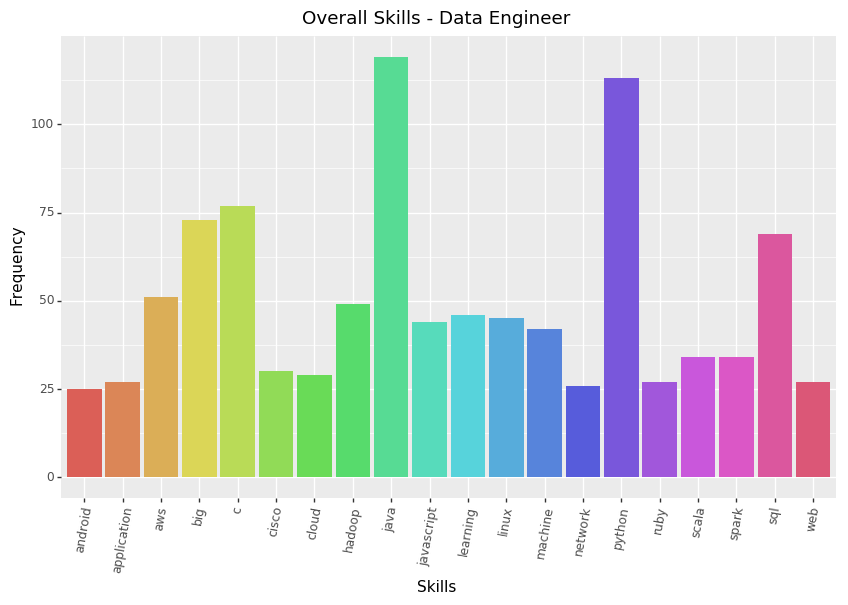

<ggplot: (159517881236)>

In [49]:
(ggplot(de_skills_frequency, aes(x = "Data Engineer", y = 'Frequency', fill='Data Engineer')) +
 geom_bar(stat = "identity", position='stack', show_legend = False)+
 theme(figure_size=(10, 6),axis_text_x= element_text(rotation=80))+
 labs(title = "Overall Skills - Data Engineer", x = "Skills", y = "Frequency")
)

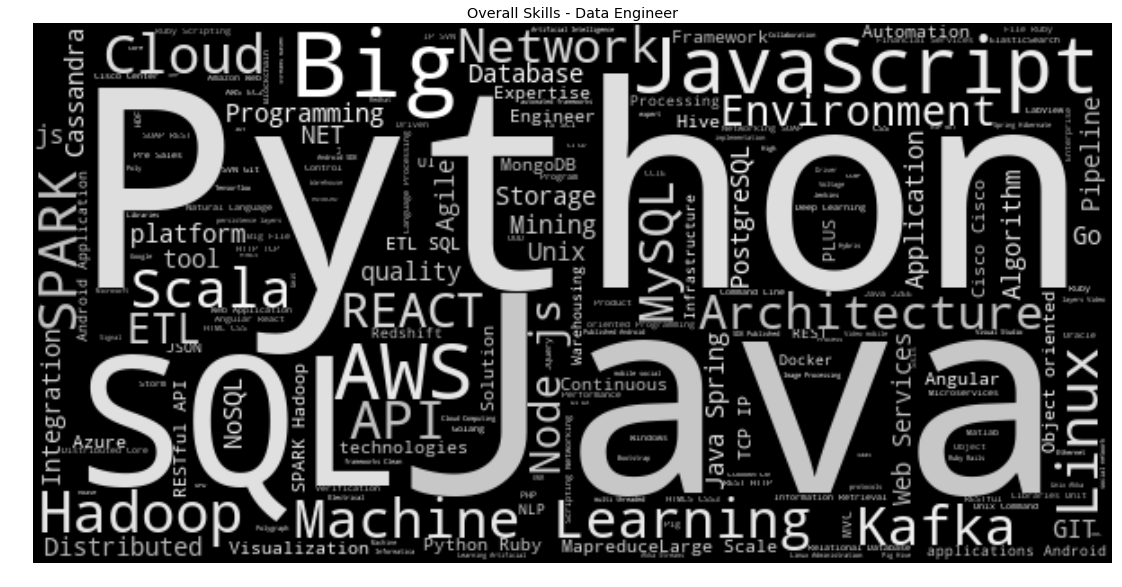

In [50]:
de_overall_skills = WordCloud(relative_scaling = 0, stopwords = stop_words, width = 600, height = 300)
de_overall_skills.generate(de_skills)
plt.figure(figsize = (15,7.5))
plt.imshow(de_overall_skills.recolor(color_func = grey_color_func, random_state = 1), interpolation = "bilinear")
plt.axis("off")
plt.tight_layout(pad = -1)
plt.title("Overall Skills - Data Engineer")
plt.show()

### Top Skills - Data Analyst

In [51]:
da_skills=' '.join([str(i) for i in data_analyst_df['Skills']])
da_skills_frequency = countsort(da_skills)
da_skills_frequency = da_skills_frequency.sort_values(by = 'count', ascending = False).reset_index(drop = True)
da_skills_frequency = da_skills_frequency.rename(columns = {'word' : 'Data Analyst', 'count' : 'Frequency'})
da_skills_frequency.head()

Data Analyst  Frequency
0          sql         31
1        excel         18
2      tableau         10
3    financial          9
4   automation          8

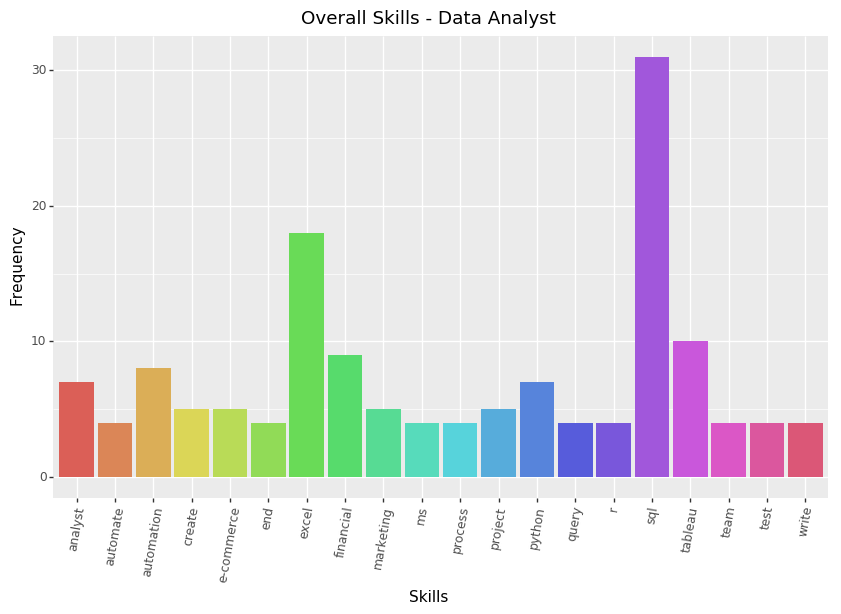

<ggplot: (159523373993)>

In [52]:
(ggplot(da_skills_frequency, aes(x = "Data Analyst", y = 'Frequency', fill='Data Analyst')) +
 geom_bar(stat = "identity", position='stack', show_legend = False)+
 theme(figure_size=(10, 6),axis_text_x= element_text(rotation=80))+
 labs(title = "Overall Skills - Data Analyst", x = "Skills", y = "Frequency")
)

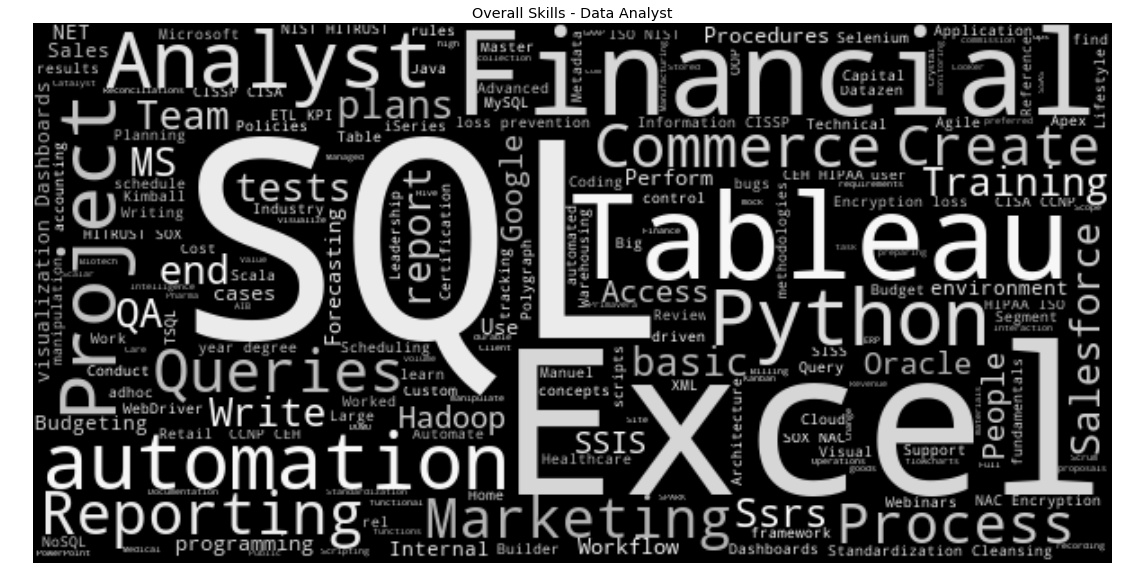

In [53]:
da_overall_skills = WordCloud(relative_scaling = 0, stopwords = stop_words, width = 600, height = 300)
da_overall_skills.generate(da_skills)
plt.figure(figsize = (15,7.5))
plt.imshow(da_overall_skills.recolor(color_func = grey_color_func, random_state = 1), interpolation = "bilinear")
plt.axis("off")
plt.tight_layout(pad = -1)
plt.title("Overall Skills - Data Analyst")
plt.show()

### Top Skills - Business Intelligence

In [54]:
bi_skills=' '.join([str(i) for i in BI_df['Skills']])
bi_skills_frequency = countsort(bi_skills)
bi_skills_frequency = bi_skills_frequency.sort_values(by = 'count', ascending = False).reset_index(drop = True)
bi_skills_frequency = bi_skills_frequency.rename(columns = {'word' : 'Business Intelligence', 'count' : 'Frequency'})
bi_skills_frequency.head()

Business Intelligence  Frequency
0          intelligence         27
1                   sql         18
2                    bi         14
3                oracle         12
4                   etl         10

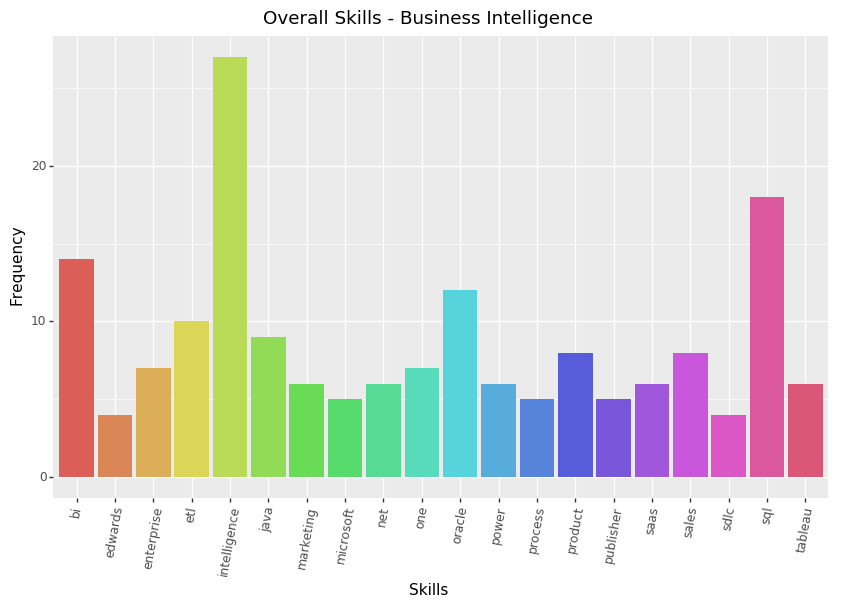

<ggplot: (-9223371877331421380)>

In [55]:
(ggplot(bi_skills_frequency, aes(x = "Business Intelligence", y = 'Frequency', fill='Business Intelligence')) +
 geom_bar(stat = "identity", position='stack', show_legend = False)+
 theme(figure_size=(10, 6),axis_text_x= element_text(rotation=80))+
 labs(title = "Overall Skills - Business Intelligence", x = "Skills", y = "Frequency")
)

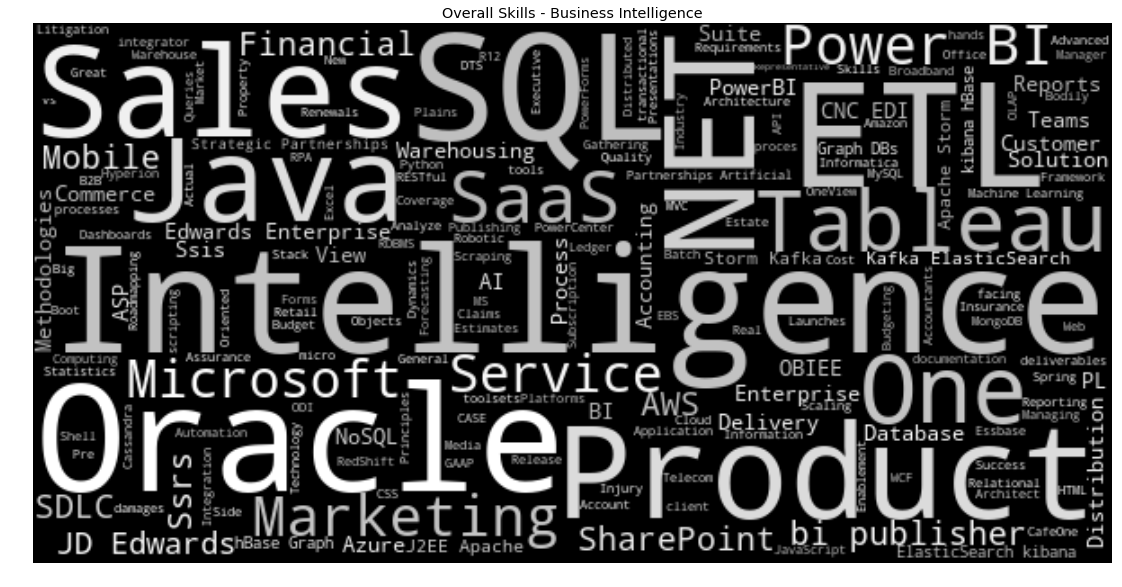

In [56]:
bi_overall_skills = WordCloud(relative_scaling = 0, stopwords = stop_words, width = 600, height = 300)
bi_overall_skills.generate(bi_skills)
plt.figure(figsize = (15,7.5))
plt.imshow(bi_overall_skills.recolor(color_func = grey_color_func, random_state = 1), interpolation = "bilinear")
plt.axis("off")
plt.tight_layout(pad = -1)
plt.title("Overall Skills - Business Intelligence")
plt.show()

# 3.) Analysis - Descriptions

In [57]:
description_df = master_data.copy()

In [58]:
#generate wordlist and lemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

In [59]:
#preprocessing function
def my_preprocessing(s):
    s = s.lower() # downcase
    s = re.sub(r"\W"," ",s)
    s = re.sub(r"\d"," ",s) 
    s = re.sub(r"\s+[a-z]\s+"," ",s)
    s = re.sub(r"^[a-zA-Z\s*]*what you will be doing",'',s)
    s = re.sub(r"\s+",' ',s)
    return s

In [60]:
responsibilities=[]
benefits=[]
jddataset = description_df['Description']
for i in range(len(jddataset)):
    s = my_preprocessing(jddataset[i])
    if 'what in it for you' in s :
        responsibility = s.split('what in it for you')[0]
        benefit = s.split('what in it for you')[1]
    else:
        responsibility = s
        benefit = ''
    responsibilities.append(responsibility)
    benefits.append(benefit)

In [61]:
def my_tokenize(s):
    tokens = nltk.tokenize.word_tokenize(s) # split string into words (tokens)
    tokens = [t for t in tokens if len(t) > 2] # remove short words, they're probably not useful
    tokens = [wordnet_lemmatizer.lemmatize(t) for t in tokens] # put words into base form
    tokens = [t for t in tokens if t not in set(stop_words)]# remove stopwords
    s = ' '.join(tokens)
    return s

In [62]:
#tokenize responsibilities
for i in range(len(responsibilities)):
    responsibilities[i] = my_tokenize(responsibilities[i])
    i = i+1

In [63]:
text = pd.DataFrame(responsibilities,columns = ['re'])
text['re'].head()

0    traffic predictor risk assessment tool determi...
1    iterate improve risk engine fraud modelswork i...
2    become cornerstone company capability across p...
3    scientist engineer responsible following build...
4    scientist please read located north austin dow...
Name: re, dtype: object

In [64]:
text_list = [i.split() for i in text['re']]
len(text_list)

510

In [65]:
stop_list = ['experience', 'data']
for i in range(len(text_list)):
    for word in list(text_list[i]):  # iterating on a copy since removing will mess things up
        if word in stop_list:
            text_list[i].remove(word)

In [67]:
# Importing Gensim
import gensim
from gensim import corpora

# Creating the term dictionary of our courpus, where every unique term is assigned an index.
dictionary = corpora.Dictionary(text_list)
dictionary.save('dictionary.dict')
print (dictionary)

Dictionary(4762 unique tokens: ['able', 'added', 'analytical', 'applied', 'apply']...)


C:\Users\qxzhao\Anaconda3\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [69]:
# Converting list of documents (corpus) into Document Term Matrix using dictionary prepared above.
doc_term_matrix = [dictionary.doc2bow(doc) for doc in text_list]
corpora.MmCorpus.serialize('corpus.mm', doc_term_matrix)

In [70]:
from time import time
import logging

logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO,
                   filename='running.log',filemode='w')

In [71]:
start = time()
# Creating the object for LDA model using gensim library
Lda = gensim.models.ldamodel.LdaModel

# Running and Trainign LDA model on the document term matrix.
ldamodel = Lda(doc_term_matrix, num_topics=10, id2word = dictionary, passes=50)
print ('used: {:.2f}s'.format(time()-start))

used: 29.78s


In [72]:
for i in ldamodel.print_topics(): 
    for j in i: print (j)

0
0.010*"need" + 0.010*"network" + 0.008*"knowledge" + 0.007*"configuration" + 0.007*"working" + 0.007*"hand" + 0.007*"product" + 0.007*"storage" + 0.006*"linux" + 0.006*"administration"
1
0.013*"need" + 0.012*"learning" + 0.012*"machine" + 0.011*"year" + 0.009*"python" + 0.008*"team" + 0.008*"knowledge" + 0.008*"project" + 0.008*"work" + 0.007*"tool"
2
0.012*"team" + 0.012*"customer" + 0.011*"work" + 0.011*"product" + 0.010*"need" + 0.010*"application" + 0.010*"year" + 0.009*"company" + 0.009*"new" + 0.008*"technology"
3
0.011*"need" + 0.009*"year" + 0.009*"work" + 0.007*"knowledge" + 0.007*"engineer" + 0.007*"quality" + 0.007*"top" + 0.006*"operation" + 0.006*"application" + 0.006*"positionat"
4
0.013*"team" + 0.011*"need" + 0.011*"web" + 0.011*"work" + 0.009*"year" + 0.009*"knowledge" + 0.008*"product" + 0.008*"python" + 0.008*"application" + 0.008*"technology"
5
0.013*"team" + 0.011*"java" + 0.010*"need" + 0.009*"architecture" + 0.009*"application" + 0.009*"product" + 0.008*"tool" 

In [73]:
ldamodel.save('topic.model')

In [75]:
import pyLDAvis.gensim
import gensim
pyLDAvis.enable_notebook()

In [76]:
d = gensim.corpora.Dictionary.load('dictionary.dict')
c = gensim.corpora.MmCorpus('corpus.mm')
lda = gensim.models.LdaModel.load('topic.model')

In [77]:
data = pyLDAvis.gensim.prepare(lda, c, d)
data

PreparedData(topic_coordinates=            Freq  cluster  topics         x         y
topic                                                
1      28.033480        1       1  0.041391  0.025725
4      16.127220        1       2 -0.003594  0.100227
6      10.337265        1       3 -0.006593  0.082034
5       9.466405        1       4 -0.084124  0.061670
2       9.228180        1       5  0.169501 -0.047610
8       9.043634        1       6  0.006426  0.055856
7       5.853783        1       7 -0.013693  0.035477
9       5.824427        1       8 -0.039658 -0.139158
0       3.447460        1       9 -0.141154 -0.094796
3       2.638140        1      10  0.071498 -0.079425, topic_info=     Category        Freq            Term       Total  loglift  logprob
term                                                                   
234   Default  218.000000             sql  218.000000  30.0000  30.0000
231   Default  278.000000        solution  278.000000  29.0000  29.0000
20    Default  245.000000         machine  245.000000  28.0000  28.0000
22    Default  542.000000            need  542.000000  27.0000  27.0000
1068  Default   89.000000           linux   89.000000  26.0000  26.0000
207   Default  101.000000         network  101.000000  25.0000  25.0000
1461  Default  126.000000             web  126.000000  24.0000  24.0000
549   Default  128.000000             aws  128.000000  23.0000  23.0000
62    Default  433.000000       knowledge  433.000000  22.0000  22.0000
213   Default  172.000000            plus  172.000000  21.0000  21.0000
520   Default  289.000000     application  289.000000  20.0000  20.0000
127   Default  157.000000     performance  157.000000  19.0000  19.0000
455   Default  212.000000            java  212.000000  18.0000  18.0000
631   Default  185.000000           cloud  185.000000  17.0000  17.0000
256   Default  317.000000         working  317.000000  16.0000  16.0000
429   Default  141.000000        customer  141.000000  15.0000  15.0000
82    Default  417.000000            work  417.000000  14.0000  14.0000
1277  Default  150.000000    architecture  150.000000  13.0000  13.0000
11    Default  210.000000        engineer  210.000000  12.0000  12.0000
17    Default  281.000000        learning  281.000000  11.0000  11.0000
936   Default   63.000000         analyst   63.000000  10.0000  10.0000
43    Default  144.000000         company  144.000000   9.0000   9.0000
79    Default  478.000000            team  478.000000   8.0000   8.0000
159   Default  153.000000           build  153.000000   7.0000   7.0000
303   Default   76.000000        pipeline   76.000000   6.0000   6.0000
238   Default  244.000000          strong  244.000000   5.0000   5.0000
83    Default  473.000000            year  473.000000   4.0000   4.0000
230   Default  241.000000           skill  241.000000   3.0000   3.0000
2593  Default   39.000000      salesforce   39.000000   2.0000   2.0000
377   Default   76.000000             top   76.000000   1.0000   1.0000
...       ...         ...             ...         ...      ...      ...
3080  Topic10    4.575893       assurance   17.844254   2.2742  -5.6831
672   Topic10    6.826347         program   40.148155   1.8633  -5.2831
807   Topic10    6.826332        training   40.246513   1.8609  -5.2831
211   Topic10    8.685933       operation   67.464684   1.5852  -5.0422
377   Topic10    9.205139             top   76.153519   1.5221  -4.9841
669   Topic10    8.173812      positionat   60.318604   1.6364  -5.1029
863   Topic10    5.996527          reason   34.386734   1.8886  -5.4127
22    Topic10   15.151318            need  542.666016   0.0567  -4.4858
786   Topic10    9.217279         quality  152.804626   0.8270  -4.9828
303   Topic10    7.136559        pipeline   76.915840   1.2576  -5.2386
666   Topic10    8.152116           least  113.153175   1.0046  -5.1056
492   Topic10    6.076195        standard   52.690594   1.4750  -5.3995
11    Topic10    9.681472        engineer  210.226120   0.5571  -4.93

In [78]:
pyLDAvis.save_html(data,'vis.html')

In [79]:
%%time
import gensim
import warnings
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
lda = gensim.models.LdaModel.load('topic.model')

Wall time: 8.98 ms


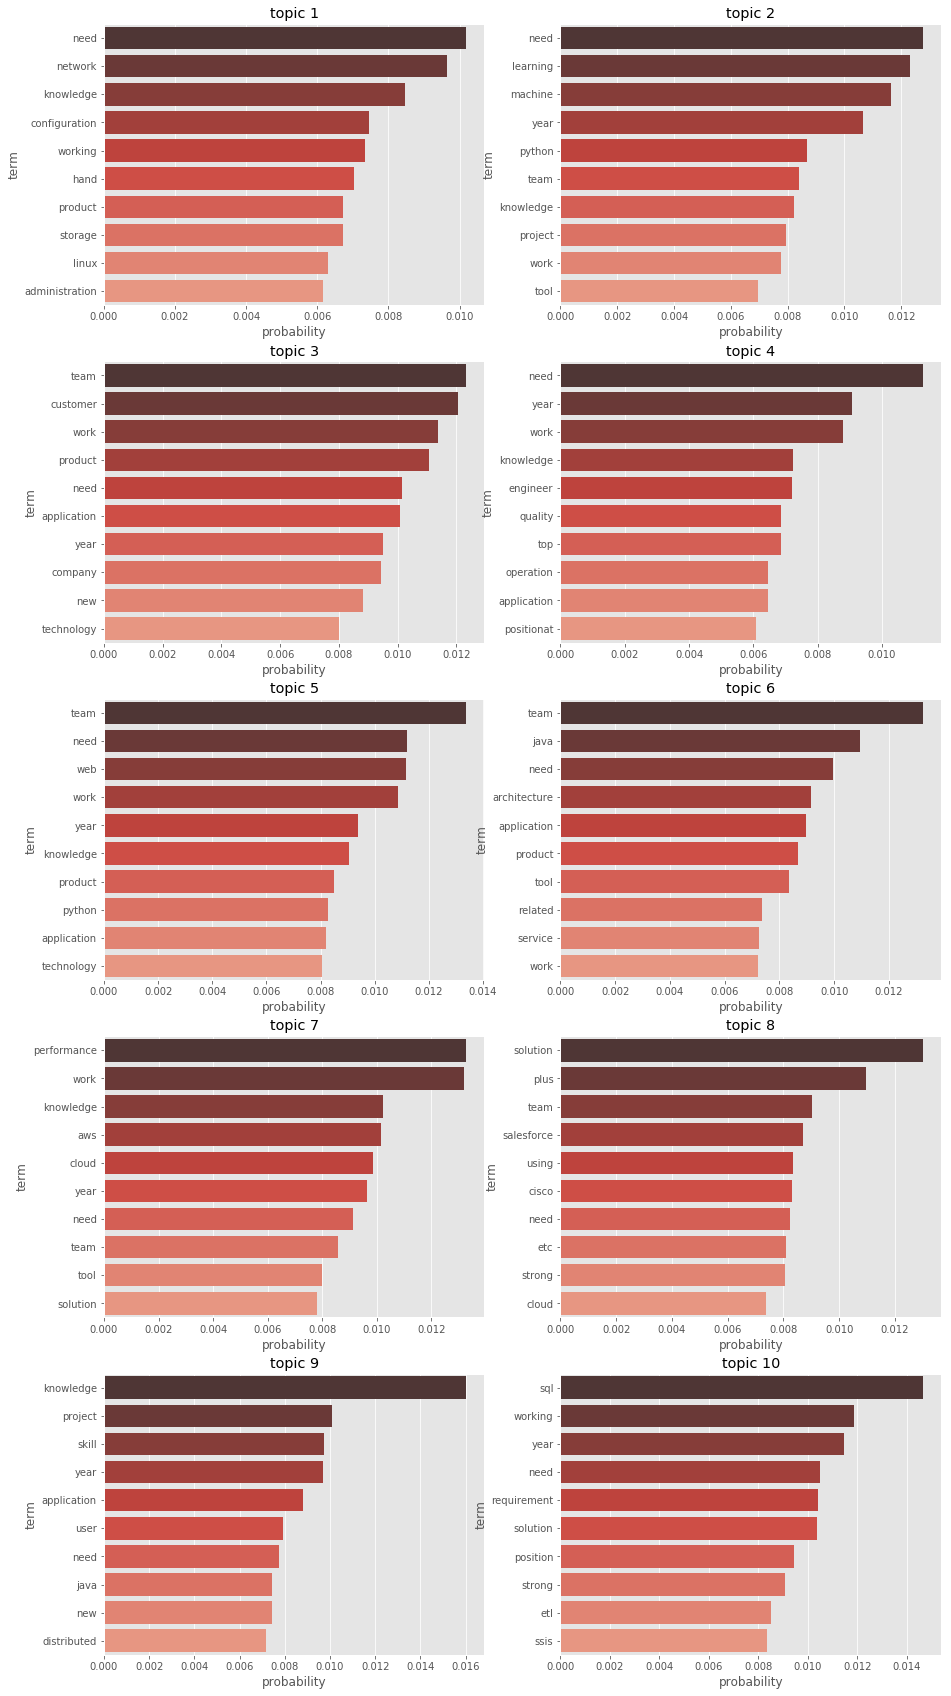

In [80]:
fiz=plt.figure(figsize=(15,30))
for i in range(10):
    df=pd.DataFrame(lda.show_topic(i), columns=['term','prob']).set_index('term')
    plt.subplot(5,2,i+1)
    plt.title('topic '+str(i+1))
    sns.barplot(x='prob', y=df.index, data=df, label='Cities', palette='Reds_d')
    plt.xlabel('probability')
    

plt.show()

### Description Word Frequency

In [81]:
word2count = {}
for data in responsibilities:
    words = nltk.word_tokenize(data)
    for word in words:
        if word not in word2count.keys():
            word2count[word] = 1
        else:
            word2count[word] += 1

In [85]:
#sort words 
from collections import OrderedDict
sorted_word = OrderedDict(sorted(word2count.items(), key=lambda kv: kv[1], reverse=True))

In [86]:
#choose most frequent ones
freq_words = heapq.nlargest(1000,word2count,key = word2count.get)

In [87]:
word_frequencies =' '.join([str(i) for i in freq_words])

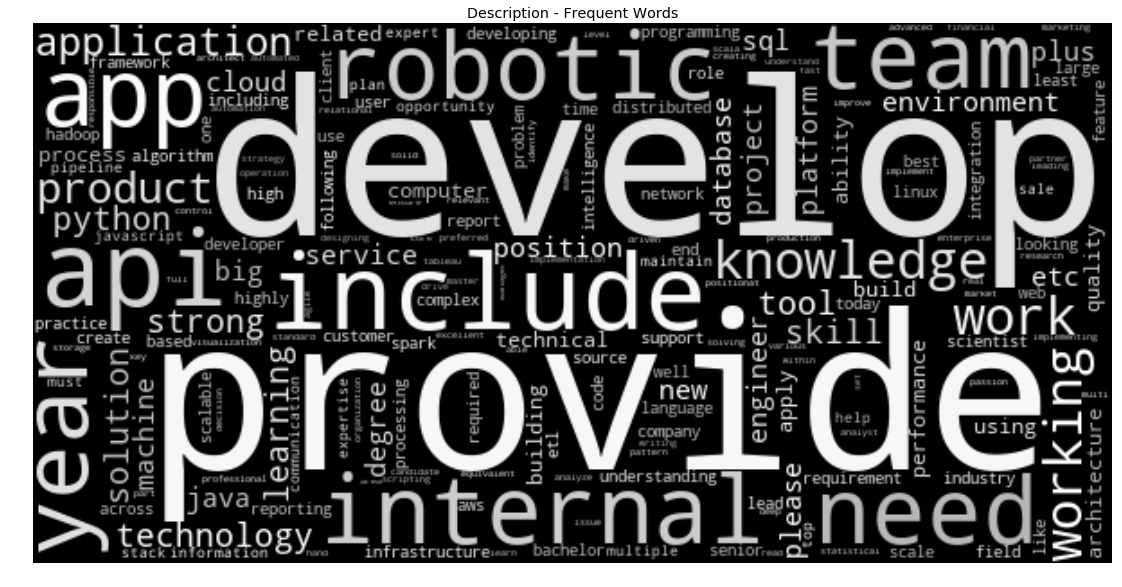

In [88]:
frequent_words = WordCloud(relative_scaling = 0, stopwords = stop_words, width = 600, height = 300)
frequent_words.generate(word_frequencies)
plt.figure(figsize = (15,7.5))
plt.imshow(frequent_words.recolor(color_func = grey_color_func, random_state = 1), interpolation = "bilinear")
plt.axis("off")
plt.tight_layout(pad = -1)
plt.title("Description - Frequent Words")
plt.show()

## Salary Analysis

### What are you expected to earn in each state?

In [89]:
min_state_df = master_data[master_data['Min_Salary'] != 'Unknown'].reset_index(drop = True)
max_state_df = master_data[master_data['Max_Salary'] != 'Unknown'].reset_index(drop = True)

In [90]:
min_state_set = np.unique(min_state_df['States'])
max_state_set = np.unique(max_state_df['States'])

min_state_dict = dict(tuple(min_state_df.groupby('States')))
max_state_dict = dict(tuple(max_state_df.groupby('States')))

In [91]:
min_state_salaries = {}
max_state_salaries = {}
for state in min_state_set:
    avg_min_salary = int(min_state_dict[state]['Min_Salary'].mean())
    min_state_salaries.update({state : avg_min_salary})

for state in max_state_set:
    avg_max_salary = int(max_state_dict[state]['Max_Salary'].mean())
    max_state_salaries.update({state : avg_max_salary})
    
min_state_salaries = OrderedDict(sorted(min_state_salaries.items(), key=lambda t: t[1]))
max_state_salaries = OrderedDict(sorted(max_state_salaries.items(), key=lambda t: t[1]))

### What is the minimum expected salary to earn in each state?

In [92]:
min_state_salaries

OrderedDict([('NV', 55000),
             ('AZ', 60000),
             ('IN', 67000),
             ('IA', 67500),
             ('GA', 70000),
             ('MI', 70000),
             ('NE', 70000),
             ('AL', 75000),
             ('KS', 80000),
             ('OH', 80000),
             ('RI', 80000),
             ('UT', 80000),
             ('CO', 82500),
             ('FL', 83333),
             ('NC', 85000),
             ('MO', 86000),
             ('MN', 90000),
             ('WI', 90000),
             ('ON', 92500),
             ('SC', 96666),
             ('MA', 97333),
             ('MD', 105833),
             ('PA', 106428),
             ('WA', 108750),
             ('VA', 109583),
             ('NH', 110000),
             ('TX', 111875),
             ('NY', 113750),
             ('CT', 115000),
             ('NJ', 118000),
             ('OR', 120000),
             ('IL', 121000),
             ('CA', 122790),
             ('DC', 140000)])

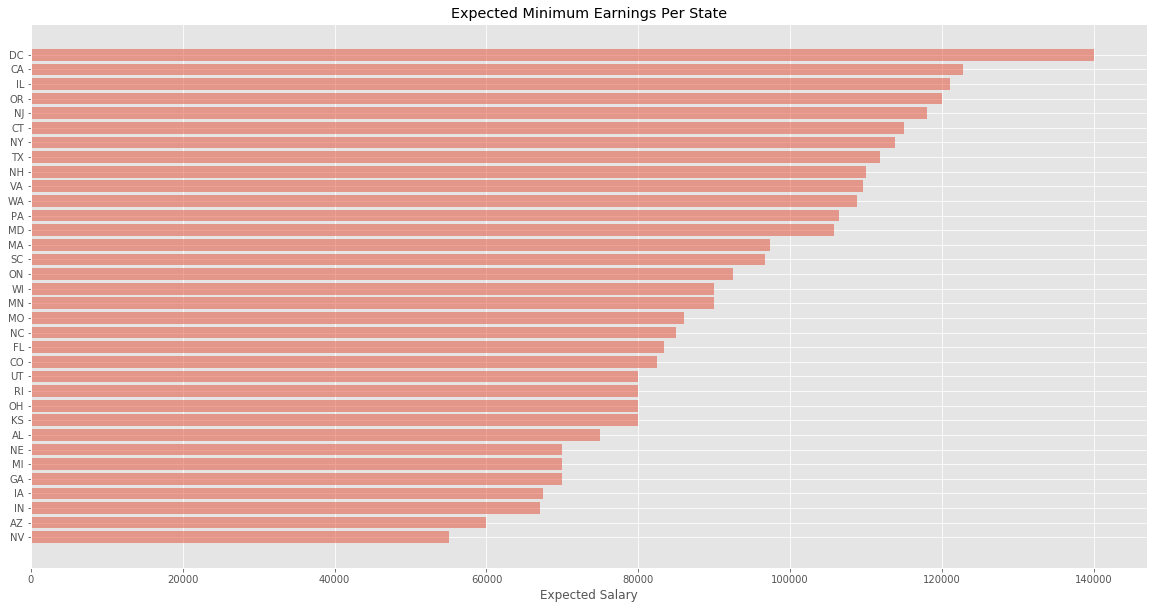

In [93]:
plt.rcParams['figure.figsize'] = (20,10)
min_state_names = list(min_state_salaries.keys())
min_state_values = sorted(list(min_state_salaries.values()))
min_state_y_pos = np.arange(len(min_state_names))

plt.barh(min_state_y_pos, min_state_values, align = 'center',alpha = 0.5)
plt.yticks(min_state_y_pos, min_state_names)
plt.xlabel('Expected Salary')
plt.title('Expected Minimum Earnings Per State')
plt.show()

In [94]:
cmin_state_salaries = pd.DataFrame({'States' : min_state_names, 'Min Earnings' : min_state_values})
cmin_state_salaries = cmin_state_salaries.sort_values(by = 'Min Earnings', ascending = False).reset_index(drop = True)
cmin_state_salaries = cmin_state_salaries[['States','Min Earnings']]
cmin_state_salaries[:10]


States  Min Earnings
0     DC        140000
1     CA        122790
2     IL        121000
3     OR        120000
4     NJ        118000
5     CT        115000
6     NY        113750
7     TX        111875
8     NH        110000
9     VA        109583

### What is the maximum expected salary to each in each state?

In [95]:
max_state_salaries

OrderedDict([('NV', 67500),
             ('AZ', 80000),
             ('RI', 85000),
             ('GA', 90000),
             ('IA', 95000),
             ('MI', 96000),
             ('IN', 96250),
             ('AL', 98750),
             ('KS', 100000),
             ('UT', 100000),
             ('CO', 108750),
             ('MN', 110000),
             ('NE', 110000),
             ('FL', 113333),
             ('MO', 116000),
             ('NC', 116875),
             ('OH', 120000),
             ('WI', 120000),
             ('PA', 134285),
             ('ON', 135000),
             ('MD', 140000),
             ('NH', 140000),
             ('NJ', 141000),
             ('MA', 143928),
             ('SC', 146666),
             ('TX', 146875),
             ('OR', 150000),
             ('VA', 154166),
             ('NY', 159375),
             ('WA', 171250),
             ('CA', 171766),
             ('CT', 175000),
             ('DC', 175000),
             ('IL', 211000)])

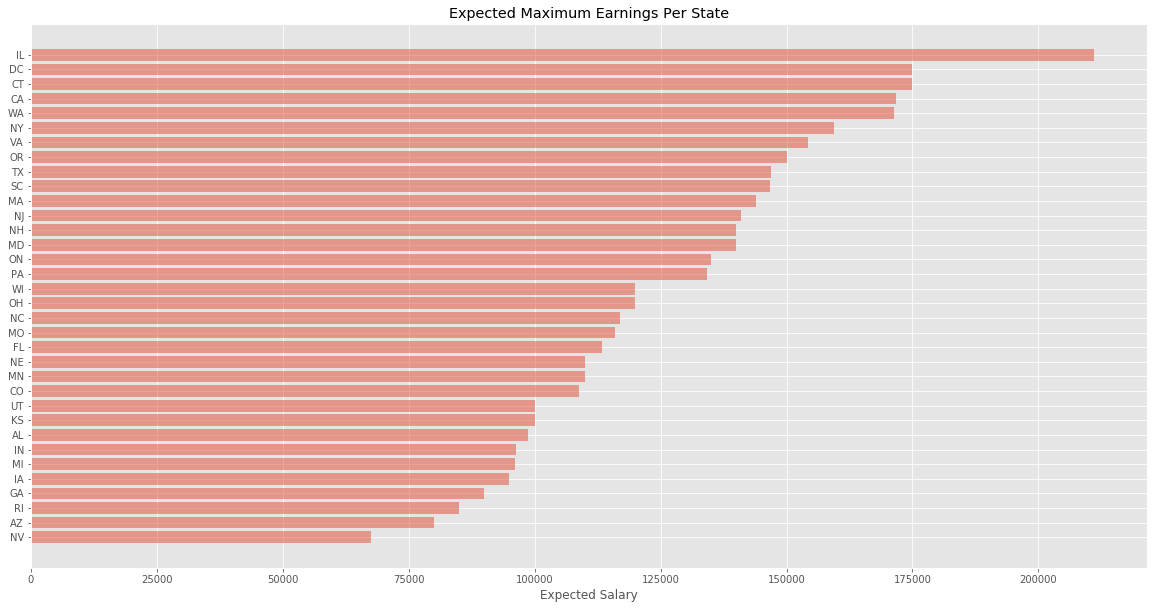

In [96]:
plt.rcParams['figure.figsize'] = (20,10)
max_state_names = list(max_state_salaries.keys())
max_state_values = sorted(list(max_state_salaries.values()))
max_state_y_pos = np.arange(len(max_state_names))

plt.barh(max_state_y_pos, max_state_values, align = 'center',alpha = 0.5)
plt.yticks(max_state_y_pos, max_state_names)
plt.xlabel('Expected Salary')
plt.title('Expected Maximum Earnings Per State')
plt.show()

In [97]:
cmax_state_salaries = pd.DataFrame({'States' : max_state_names, 'Max Earnings' : max_state_values})
cmax_state_salaries = cmax_state_salaries.sort_values(by = 'Max Earnings', ascending = False).reset_index(drop = True)
cmax_state_salaries = cmax_state_salaries[['States','Max Earnings']]
cmax_state_salaries[:10]

States  Max Earnings
0     IL        211000
1     DC        175000
2     CT        175000
3     CA        171766
4     WA        171250
5     NY        159375
6     VA        154166
7     OR        150000
8     TX        146875
9     SC        146666

### What are the expected earnings for the top 10 highest minimum and maximum location salaries?

In [98]:
min_location_df = master_data[master_data['Min_Salary'] != 'Unknown'].reset_index(drop = True)
max_location_df = master_data[master_data['Max_Salary'] != 'Unknown'].reset_index(drop = True)

In [99]:
min_location_set = np.unique(min_location_df['Location'])
max_location_set = np.unique(max_location_df['Location'])

min_location_dict = dict(tuple(min_location_df.groupby('Location')))
max_location_dict = dict(tuple(max_location_df.groupby('Location')))

In [100]:
min_location_salaries = {}
max_location_salaries = {}
for state in min_location_set:
    LOCavg_min_salary = int(min_location_dict[state]['Min_Salary'].mean())
    min_location_salaries.update({state : LOCavg_min_salary})

for state in max_location_set:
    LOCavg_max_salary = int(max_location_dict[state]['Max_Salary'].mean())
    max_location_salaries.update({state : LOCavg_max_salary})
    
min_location_salaries = OrderedDict(sorted(min_location_salaries.items(), key=lambda t: t[1]))
max_location_salaries = OrderedDict(sorted(max_location_salaries.items(), key=lambda t: t[1]))

from collections import Counter
min_location_salaries = collections.Counter(min_location_salaries).most_common(10)
max_location_salaries = collections.Counter(max_location_salaries).most_common(10)

min_location_salaries = OrderedDict(sorted(dict(min_location_salaries).items(), key = lambda t:t[1]))
max_location_salaries = OrderedDict(sorted(dict(max_location_salaries).items(), key = lambda t:t[1]))

In [101]:
min_location_salaries

OrderedDict([('Long Beach, CA', 140000),
             ('Ventura County, CA', 140000),
             ('Washington, DC', 140000),
             ('San Mateo, CA', 142500),
             ('Brooklyn, NY', 150000),
             ('Milpitas, CA', 156666),
             ('Sunnyvale, CA', 158333),
             ('Palo Alto, CA', 160000),
             ('Santa Clara, CA', 160000),
             ('Cupertino, CA', 175000)])

In [102]:
max_location_salaries

OrderedDict([('Sunnyvale, CA', 198333),
             ('San Jose, CA', 198636),
             ('Annapolis Junction, MD', 200000),
             ('Brooklyn, NY', 200000),
             ('Fairfield, CT', 200000),
             ('Santa Clara, CA', 200000),
             ('Palo Alto, CA', 206428),
             ('Chicago, IL', 242500),
             ('West Hollywood, CA', 250000),
             ('Cupertino, CA', 325000)])

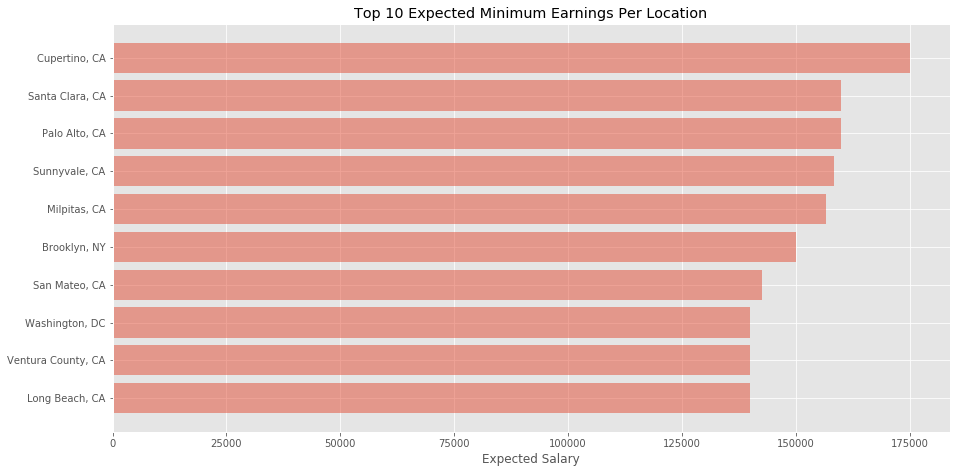

In [103]:
plt.rcParams['figure.figsize'] = (15,7.5)
min_location_names = list(min_location_salaries.keys())
min_location_values = sorted(list(min_location_salaries.values()))
min_location_y_pos = np.arange(len(min_location_names))

plt.barh(min_location_y_pos, min_location_values, align = 'center',alpha = 0.5)
plt.yticks(min_location_y_pos, min_location_names)
plt.xlabel('Expected Salary')
plt.title('Top 10 Expected Minimum Earnings Per Location')
plt.show()

In [104]:
cmin_location_salaries = pd.DataFrame({'Location' : min_location_names, 'Min Earnings' : min_location_values})
cmin_location_salaries = cmin_location_salaries.sort_values(by = 'Min Earnings', ascending = False).reset_index(drop = True)
cmin_location_salaries = cmin_location_salaries[['Location','Min Earnings']]
cmin_location_salaries

Location  Min Earnings
0       Cupertino, CA        175000
1       Palo Alto, CA        160000
2     Santa Clara, CA        160000
3       Sunnyvale, CA        158333
4        Milpitas, CA        156666
5        Brooklyn, NY        150000
6       San Mateo, CA        142500
7      Long Beach, CA        140000
8  Ventura County, CA        140000
9      Washington, DC        140000

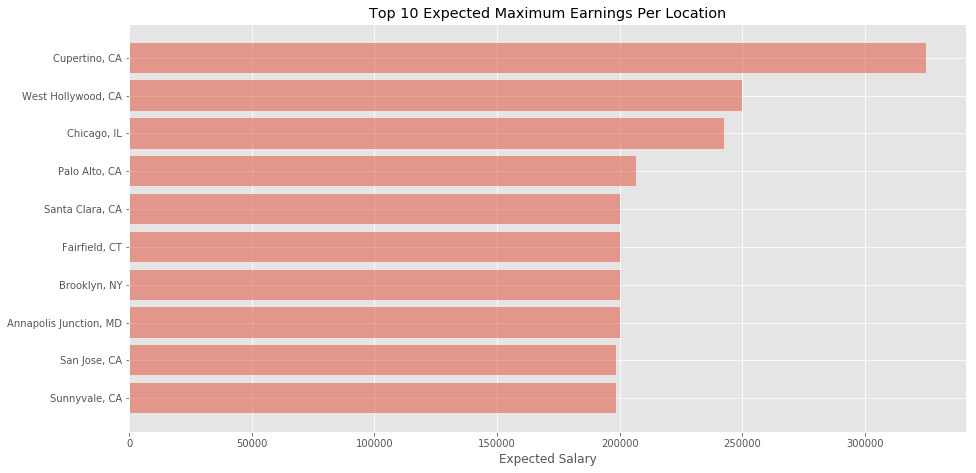

In [105]:
plt.rcParams['figure.figsize'] = (15,7.5)
max_location_names = list(max_location_salaries.keys())
max_location_values = sorted(list(max_location_salaries.values()))
max_location_y_pos = np.arange(len(max_location_names))

plt.barh(max_location_y_pos, max_location_values, align = 'center',alpha = 0.5)
plt.yticks(max_location_y_pos, max_location_names)
plt.xlabel('Expected Salary')
plt.title('Top 10 Expected Maximum Earnings Per Location')
plt.show()

In [106]:
cmax_location_salaries = pd.DataFrame({'Location' : max_location_names, 'Max Earnings' : max_location_values})
cmax_location_salaries = cmax_location_salaries.sort_values(by = 'Max Earnings', ascending = False).reset_index(drop = True)
cmax_location_salaries = cmax_location_salaries[['Location','Max Earnings']]
cmax_location_salaries

Location  Max Earnings
0           Cupertino, CA        325000
1      West Hollywood, CA        250000
2             Chicago, IL        242500
3           Palo Alto, CA        206428
4  Annapolis Junction, MD        200000
5            Brooklyn, NY        200000
6           Fairfield, CT        200000
7         Santa Clara, CA        200000
8            San Jose, CA        198636
9           Sunnyvale, CA        198333

### What are the expected earnings minimum and maximum earnings for each job type (Data Scientist, Data Engineer, Data Analyst, and Business Intelligence)?

In [107]:
min_job_df = master_data[master_data['Min_Salary'] != 'Unknown'].reset_index(drop = True)
max_job_df = master_data[master_data['Max_Salary'] != 'Unknown'].reset_index(drop = True)

In [108]:
min_job_set = np.unique(min_job_df['Search'])
max_job_set = np.unique(max_job_df['Search'])

min_job_dict = dict(tuple(min_job_df.groupby('Search')))
max_job_dict = dict(tuple(max_job_df.groupby('Search')))

In [109]:
min_job_salaries = {}
max_job_salaries = {}
for job in min_job_set:
    avg_MINjob_salary = int(min_job_dict[job]['Min_Salary'].mean())
    min_job_salaries.update({job : avg_MINjob_salary})

for job in max_job_set:
    avg_MAXjob_salary = int(max_job_dict[job]['Max_Salary'].mean())
    max_job_salaries.update({job : avg_MAXjob_salary})
    
min_job_salaries = OrderedDict(sorted(min_job_salaries.items(), key=lambda t: t[1]))
max_job_salaries = OrderedDict(sorted(max_job_salaries.items(), key=lambda t: t[1]))

In [110]:
min_job_salaries

OrderedDict([('Data Analyst', 75000),
             ('Data Engineer', 112893),
             ('Business Intelligence', 117187),
             ('Data Scientist', 122065)])

In [111]:
max_job_salaries

OrderedDict([('Data Analyst', 97777),
             ('Business Intelligence', 155161),
             ('Data Engineer', 158580),
             ('Data Scientist', 176521)])

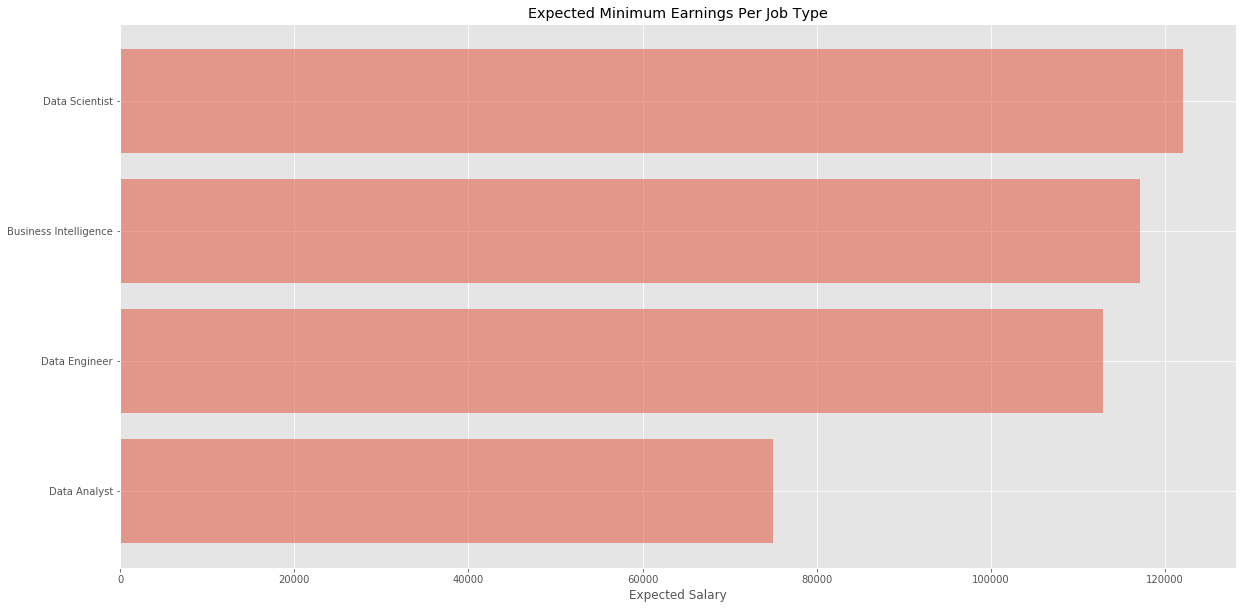

In [112]:
plt.rcParams['figure.figsize'] = (20,10)
min_job_names = list(min_job_salaries.keys())
min_job_values = sorted(list(min_job_salaries.values()))
min_job_y_pos = np.arange(len(min_job_names))

plt.barh(min_job_y_pos, min_job_values, align = 'center',alpha = 0.5)
plt.yticks(min_job_y_pos, min_job_names)
plt.xlabel('Expected Salary')
plt.title('Expected Minimum Earnings Per Job Type')
plt.show()

In [113]:
cmin_job_salaries = pd.DataFrame({'Job Type' : min_job_names, 'Min Earnings' : min_job_values})
cmin_job_salaries = cmin_job_salaries.sort_values(by = 'Min Earnings', ascending = False).reset_index(drop = True)
cmin_job_salaries = cmin_job_salaries[['Job Type','Min Earnings']]
cmin_job_salaries

Job Type  Min Earnings
0         Data Scientist        122065
1  Business Intelligence        117187
2          Data Engineer        112893
3           Data Analyst         75000

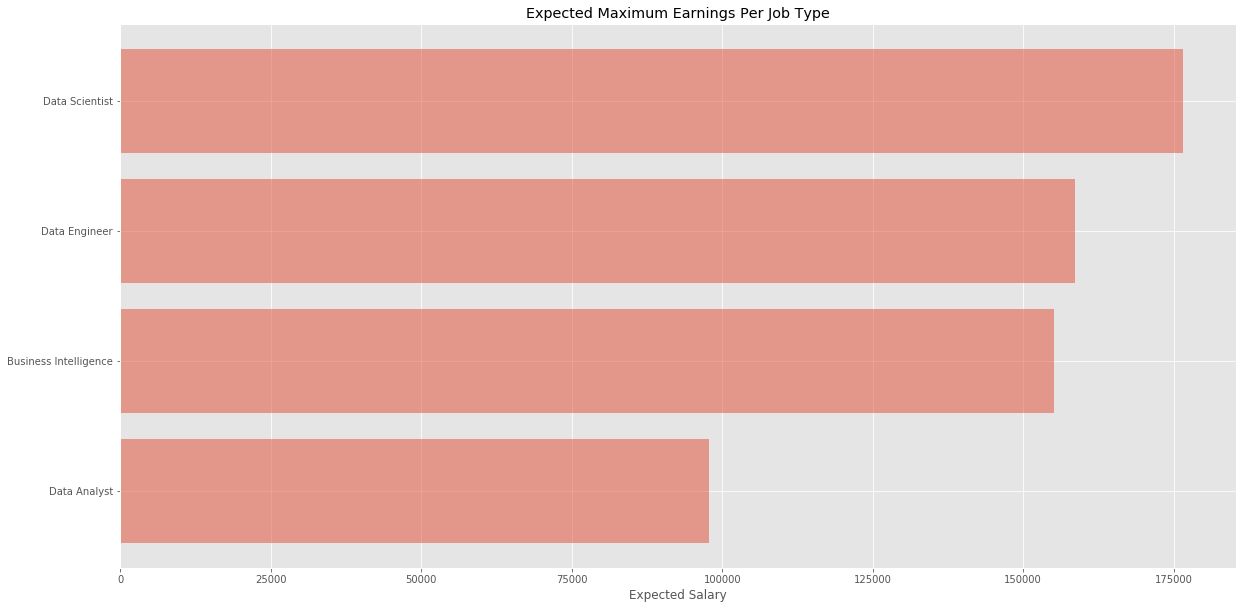

In [114]:
plt.rcParams['figure.figsize'] = (20,10)
max_job_names = list(max_job_salaries.keys())
max_job_values = sorted(list(max_job_salaries.values()))
max_job_y_pos = np.arange(len(max_job_names))

plt.barh(max_job_y_pos, max_job_values, align = 'center',alpha = 0.5)
plt.yticks(max_job_y_pos, max_job_names)
plt.xlabel('Expected Salary')
plt.title('Expected Maximum Earnings Per Job Type')
plt.show()

In [115]:
cmax_job_salaries = pd.DataFrame({'Job Type' : max_job_names, 'Max Earnings' : max_job_values})
cmax_job_salaries = cmax_job_salaries.sort_values(by = 'Max Earnings', ascending = False).reset_index(drop = True)
cmax_job_salaries = cmax_job_salaries[['Job Type','Max Earnings']]
cmax_job_salaries

Job Type  Max Earnings
0         Data Scientist        176521
1          Data Engineer        158580
2  Business Intelligence        155161
3           Data Analyst         97777

# exploratory analysis

In [116]:
import pandas as pd
import numpy as np
import plotnine as gg
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
import geopandas as gpd         
import osmnx as ox              
import shapely.geometry as geom 
df = master_data

In [117]:
df.Mean_Salary = pd.to_numeric(df.Mean_Salary, errors='coerce')
df.Max_Salary = pd.to_numeric(df.Max_Salary, errors='coerce')
df.Min_Salary= pd.to_numeric(df.Min_Salary, errors='coerce')

In [118]:
df1 = df.dropna(subset = ['Mean_Salary', 'Min_Salary', 'Max_Salary'])

# distribution of mean salary

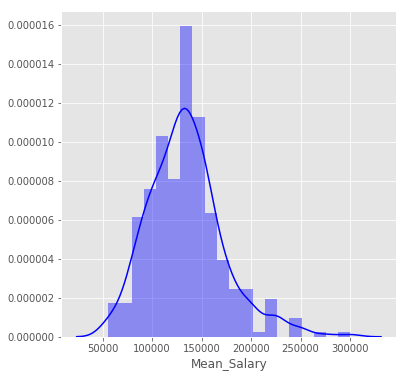

In [119]:
# histogram
plt.figure(figsize=(6,6))
sns.distplot(df1['Mean_Salary'].dropna(),color = 'blue')

## Is there a different distribution of location(State, City)/Job Title(data scientist/analyst/engineer/BI) of mean salary?

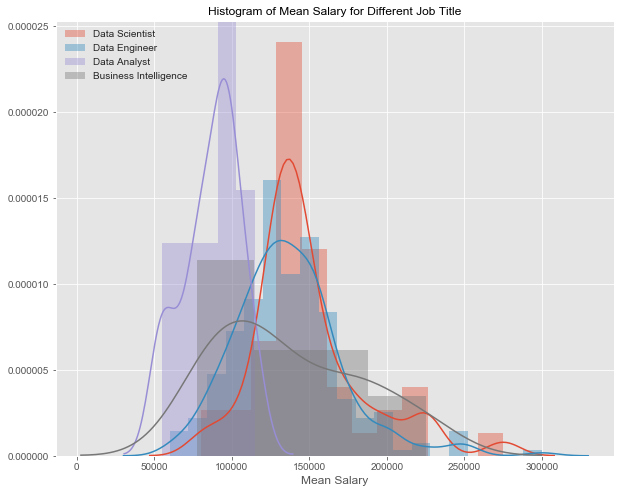

In [120]:
#histogram of price based on different job titles
job_type = df1.Search.unique()

plt.subplots(figsize=(10,8))
for t in np.ndenumerate(job_type):
    kind = df1[df1['Search'] == t[1]]
    sns.distplot(kind.Mean_Salary.dropna(), label=t[1], norm_hist = True)
    
sns.set(rc={'figure.figsize':(11.7,8.27)})
plt.legend(loc=2)
plt.title('Histogram of Mean Salary for Different Job Title')
plt.xlabel('Mean Salary')
plt.show()

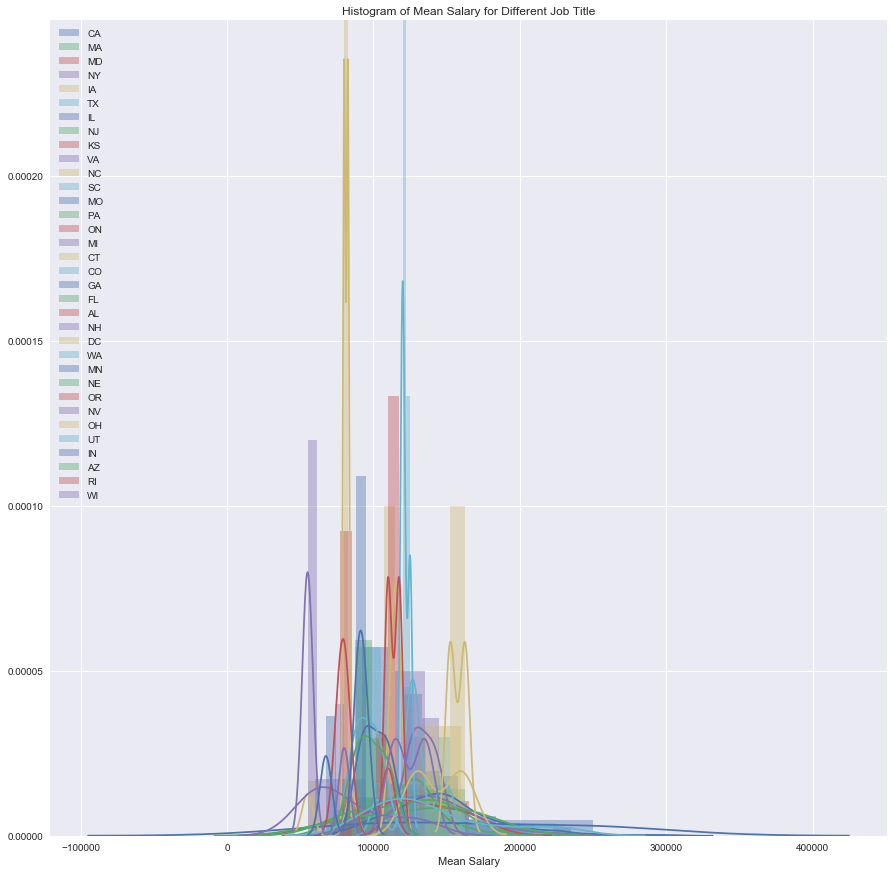

In [121]:
#histogram of price based on different states
job_type = df1.States.unique()

plt.subplots(figsize=(15,15))
for t in np.ndenumerate(job_type):
    kind = df1[df1['States'] == t[1]]
    sns.distplot(kind.Mean_Salary.dropna(), label=t[1], norm_hist = True)
    
sns.set(rc={'figure.figsize':(11.7,8.27)})
plt.legend(loc=2)
plt.title('Histogram of Mean Salary for Different Job Title')
plt.xlabel('Mean Salary')
plt.show()

In [122]:
df1.groupby(['States','Search']).agg({'Mean_Salary': 'mean'}).head()

Mean_Salary
States Search                              
AL     Business Intelligence   77500.000000
       Data Engineer           90000.000000
AZ     Data Analyst            70000.000000
CA     Business Intelligence  170357.142857
       Data Analyst            99166.666667

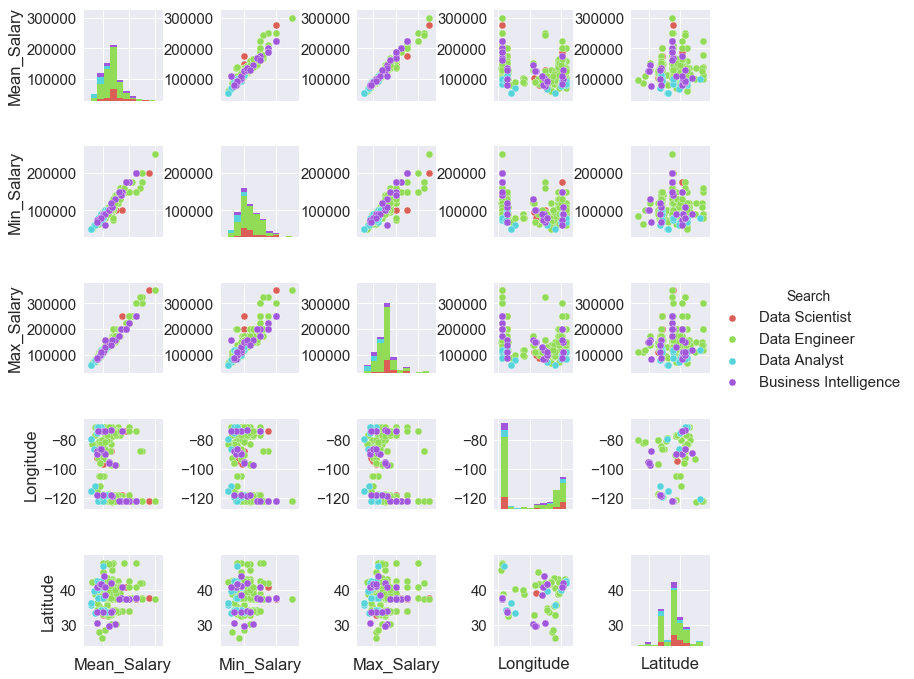

In [123]:
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats

# Pair plot to explore variables
with sns.plotting_context("notebook",font_scale=1.5):
    g = sns.pairplot(df1, vars = ['Mean_Salary','Min_Salary','Max_Salary','Longitude','Latitude'], hue='Search',
                    palette= sns.hls_palette(4),size=2)
g.set(xticklabels=[]);


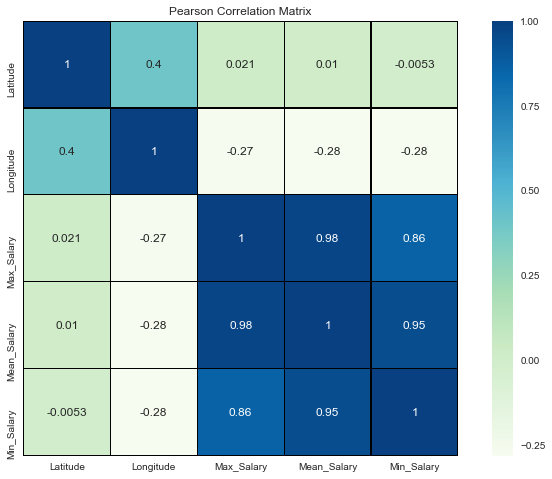

In [124]:
# seaborn correlation matrix
str_list = []
for colname, colvalue in df1.iteritems():
    if type(colvalue[1]) == str:
         str_list.append(colname)
            
# Only compare numerical features          
diff_list = df1.columns.difference(str_list) 
df2 = df1[diff_list]
f, ax = plt.subplots(figsize=(12, 8))
plt.title('Pearson Correlation Matrix')

sns.heatmap(df2.astype(float).corr(),linewidths=0.25,vmax=1.0, square=True, cmap="GnBu", linecolor='k', annot=True)
plt.show()

# Linear regression model of salary

In [125]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error 
from sklearn import preprocessing

In [126]:
df2 = df1[['Mean_Salary','Latitude','Longitude']]
df2.dtypes

Mean_Salary    float64
Latitude       float64
Longitude      float64
dtype: object

In [127]:
from sklearn.cross_validation import train_test_split
train_data, test_data = train_test_split(df2, train_size = 0.8, random_state = 10)

__Simple Linear Regression (One Variable)__

In [128]:
def simple_linear(train, test, feature):
    """simple linear regression function specified for the use of our dataset 
    Args:
        train(dataframe): training dataset
        test(dataframe): testing dataset
        feature(Series): features in a dataset
    Returns:
        RMSE(float): Root Mean Squared Error
        regr.intercept (float): regression interception
        regr.coefficient (float): regression coefficient
    """
    regr = linear_model.LinearRegression()
    #Train the model
    regr.fit(train.as_matrix(columns = [feature]), train.as_matrix(columns = ['Mean_Salary']))
    # Calculate the RMSE on test data
    RMSE = mean_squared_error(test.as_matrix(columns = ['Mean_Salary']), 
                              regr.predict(test.as_matrix(columns = [feature])))**0.5 
    return RMSE, regr.intercept_[0], regr.coef_[0][0]

#create an input list, remove the variables we are predicting and non-numerical data
input_list = train_data.columns.values.tolist()
input_list.remove('Mean_Salary') 

simple_linear_result = pd.DataFrame(columns = ['feature', 'RMSE', 'intercept', 'coefficient'])

# Calculate the RMSE of the test data for each feature
for p in input_list:
    RMSE, w1, w0 = simple_linear(train_data, test_data, p)
    simple_linear_result = simple_linear_result.append({'feature':p, 'RMSE':RMSE, 'intercept':w0, 'coefficient': w1}
                                                        ,ignore_index=True)
simple_linear_result

feature          RMSE   intercept    coefficient
0   Latitude  41871.408596 -164.509380  139619.119439
1  Longitude  39163.987282 -454.573073   87163.225969

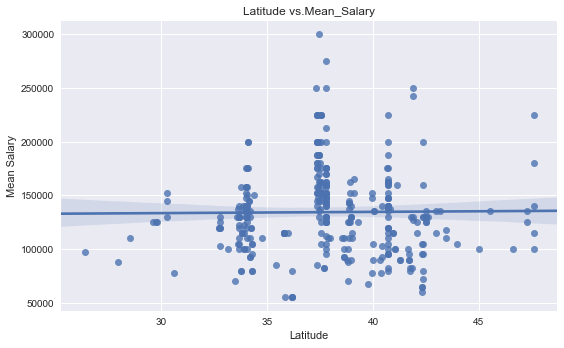

In [129]:
#plot scatterplot 
plt.figure(figsize=(8, 5))
ax = sns.regplot(x = df2.Latitude, y = df2.Mean_Salary)
plt.title('Latitude vs.Mean_Salary')
plt.xlabel('Latitude')
plt.ylabel('Mean Salary')

plt.tight_layout()

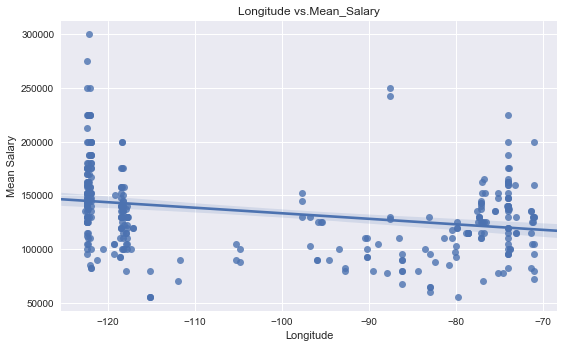

In [130]:
#plot scatterplot 
plt.figure(figsize=(8, 5))
ax = sns.regplot(x = df2.Longitude, y = df2.Mean_Salary)
plt.title('Longitude vs.Mean_Salary')
plt.xlabel('Longitude')
plt.ylabel('Mean Salary')

plt.tight_layout()

__Multi Linear Regression (Two Variables)__

In [131]:
# further split the train_data to include a validation set
#train_data2 = 60%, validation_data = 20%, test_data = 20%
train_data_2, validation_data = train_test_split(train_data, train_size = 0.75, random_state = 50)

In [132]:
def RMSE(train, validation, features, new_input):
    """RMSE specified for the return RMSE of features
    Args:
        train(dataframe): training dataset
        validation(dataframe): validation dataset
        feature(Series): features in a dataset
        new_input (feature): reminding feature in the dataset
    Returns:
        RMSE(float): Root Mean Squared Error of train data
        RMSE(float): Root Mean Squared Error of validation data
    """
    features_list = list(features)
    features_list.append(new_input)
    regr = linear_model.LinearRegression() 
    regr.fit(train.as_matrix(columns = features_list), train.as_matrix(columns = ['Mean_Salary'])) # Train the model
    RMSE_train = mean_squared_error(train.as_matrix(columns = ['Mean_Salary']), 
                              regr.predict(train.as_matrix(columns = features_list)))**0.5 # Calculate the RMSE on train data
    RMSE_validation = mean_squared_error(validation.as_matrix(columns = ['Mean_Salary']), 
                              regr.predict(validation.as_matrix(columns = features_list)))**0.5 # Calculate the RMSE on train data
    return RMSE_train, RMSE_validation 

In [133]:
input_list = train_data_2.columns.values.tolist()
input_list.remove('Mean_Salary')

greedy_algorithm = pd.DataFrame(columns = ['feature', 'train_error', 'validation_error'])  
i = 0
temp_list = []


# Go through all the features in the dataframe
while len(input_list)>0:
    
    # temporarily store the best feature at each iteration
    temp = pd.DataFrame(columns = ['feature', 'train_error', 'validation_error'])
    
    # to test all the remaining features
    for p in input_list:
        RMSE_train, RMSE_validation = RMSE(train_data_2, validation_data, temp_list, p)
        temp = temp.append({'feature':p, 'train_error':RMSE_train, 'validation_error':RMSE_validation}, ignore_index=True)
    
    # select the best feature with smallest train error
    temp = temp.sort_values('train_error')
    best = temp.iloc[0,0]
    temp_list.append(best)
    greedy_algorithm = greedy_algorithm.append({'feature': best, 
                                                  'train_error': temp.iloc[0,1], 'validation_error': temp.iloc[0,2]}, 
                                                 ignore_index=True)
    #remove the best feature before next iteration
    input_list.remove(best)
    i += 1
greedy_algorithm

feature   train_error  validation_error
0  Longitude  36032.224401      37498.709677
1   Latitude  35913.278990      37085.005686

In [134]:
def multiple_regression_model(train, test, input_features):
    """modifided version of simple linear regression function to take mutliple features
    Args:
        train(dataframe): training dataset
        test(dataframe): testing dataset
        input_feature(Series): features in a dataset
    Returns:
        RMSE(float): Root Mean Squared Error
        regr.intercept (float): regression interception
        regr.coefficient (float): regression coefficient
    """
    regr = linear_model.LinearRegression() # Create a linear regression object
    regr.fit(train.as_matrix(columns = input_features), train.as_matrix(columns = ['Mean_Salary'])) # Train the model
    RMSE = mean_squared_error(test.as_matrix(columns = ['Mean_Salary']), 
                              regr.predict(test.as_matrix(columns = input_features)))**0.5 # Calculate the RMSE on test data
    return RMSE, regr.intercept_[0], regr.coef_ 

In [135]:
greedy_algo_features_list = greedy_algorithm['feature'].tolist()[:4]
test_error, _, _ = multiple_regression_model(train_data_2, test_data, greedy_algo_features_list)
print ('test error (RMSE) is: %s' %test_error)

test error (RMSE) is: 38608.92277578898


Mean_Salary = -14648.4802 + Longitude x -575.3558 + Latitude x 2448.8531

In [136]:
multiple_regression_model(train_data_2, test_data, greedy_algo_features_list)

(38608.92277578898, 53862.7241817122, array([[-462.39185205,  886.88353135]]))

# Job Description Analysis

In [137]:
def gen_list(col):
    df[col] = [0]*df.shape[0]
    return df[col]

degree = ['BS','MS','PhD']
major = ['Statistics', 'CS','Mathematics','Machine Learning']
for l in major + degree:
    gen_list(l)
    
for i in range(df.shape[0]):
    for j in range(len(major)):
        if major[j] in df['Description'][i]:
            df[major[j]][i] = 1
        if 'Computer Science' in  df['Description'][i]:
            df['CS'] = 1
            
for i in range(df.shape[0]):
    for j in range(len(degree)):
        if degree[j] in df['Description'][i]:
            df[degree[j]][i] = 1
        if 'Bachelor' in  df['Description'][i]:
            df['BS'] = 1
        if 'Master' in  df['Description'][i]:
            df['MS'] = 1           
            
ds = df[df['Search'] == 'Data Scientist']
de = df[df['Search'] == 'Data Engineer']
da = df[df['Search'] == 'Data Analyst']
bi = df[df['Search'] == 'Business Intelligence']


In [138]:
def deg_and_major(df):
    return df.apply( lambda s : s.value_counts().get(1,1), axis=0)

Job_Title = []
BS = []
MS = []
PhD = []
Sta = []
CS = []
Mat = []
ML = []
All =[df.shape[0], ds.shape[0],de.shape[0],da.shape[0],bi.shape[0]]
title = ['All Data Realated Jobs','Data Scientist','Data Engineer','Data Analyst','Business Intelligence']
Data = [deg_and_major(df),deg_and_major(ds),deg_and_major(ds),deg_and_major(da),deg_and_major(bi)]
for i in range(len(Data)):
    Job_Title.append(title[i])
    Sta.append(Data[i][13])
    CS.append(Data[i][14])
    Mat.append(Data[i][15])
    ML.append(Data[i][16])
    BS.append(Data[i][17])
    MS.append(Data[i][18])
    PhD.append(Data[i][19])
    
dict={'Job Title':Job_Title,
      'BS':BS,
      'MS':MS,
      'PhD':PhD,
      'Statistics':Sta,
      'Computer Science':CS,
      'Mathematics':Mat,
      'Machine Learning':ML,
      'Count':All}

df3 = pd.DataFrame(dict)                   
df3 = df3[['Job Title','Count','BS','MS', 'PhD','Statistics','Computer Science','Mathematics','Machine Learning']]  

In [139]:
df3.head()

Job Title  Count   BS   MS  PhD  Statistics  Computer Science  \
0  All Data Realated Jobs    510  510  510   45          31               510   
1          Data Scientist     67   67   67   22          20                67   
2           Data Engineer    346   67   67   22          20                67   
3            Data Analyst     49   49   49    1           3                49   
4   Business Intelligence     48   48   48    1           1                48   

   Mathematics  Machine Learning  
0           11                88  
1            7                38  
2            7                38  
3            1                 1  
4            1                 3